# Kmodes analysis
install pre reqs

In [1368]:
#https://www.kaggle.com/code/ashydv/bank-customer-clustering-k-modes-clustering
#pip install kmodes plotnine matplotlib scipy seaborn missingno plotly pyod pythresh gower


In [1369]:
from kmodes.kmodes import KModes
import sklearn as skl

import pandas as pd

#df = pd.read_csv("iocs-export.csv",header=None,on_bad_lines='skip')
#https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data
#df = pd.read_csv("iocs-export.csv",delimiter=';', skiprows=0, low_memory=False)
#https://stackoverflow.com/questions//python-pandas-error-tokenizing-data

In [1370]:
#print('Dimension data: {} rows and {} columns'.format(len(df), len(df.columns)))
# Print the first 5 rows
#df.head()

In [1371]:
#df.info()

In [1372]:
#df.select_dtypes('object').nunique()

In [1373]:
#df.describe()

In [1374]:
#df.isna().sum()

In [1375]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks


In [1376]:
df = pd.read_csv("iocs-export1.csv",delimiter=';', skiprows=0, low_memory=False)

In [1377]:
df.head()

,ip,port,protocol,version,xorkey,domains,host_header,first_seen,last_seen,delta_days,...,asn,org,user_agent,spawnto_x86,spawnto_x64,procinj_execute,submituri,watermark_hex,modifications,is_modified
0,81.95.5.146,443,https,"Cobalt Strike 3.6 (Dec 08, 2016)",105,81.95.5.146,NaN,04/07/18,26/11/18,145,...,201011,AS33891 Netzbetrieb GmbH,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,/safebrowsing/rd/CINnu27nLO8hbHdfgmUtc2ihdmFyE...,0x0,modified_trial,True
1,122.116.41.237,80,http,"Cobalt Strike 3.6 (Dec 08, 2016)",105,122.116.41.237,NaN,04/07/18,04/07/18,1,...,3462,Data Communication Business Group,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,/submit.php,0x0,normal,False
2,51.255.42.170,80,dns,"Cobalt Strike 3.4 (Jul 29, 2016)",105,"cdn.incdigest.com, freepics.incdigest.com, pro...",NaN,04/07/18,05/12/18,154,...,16276,OVH SAS,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,0,0,0,/submit.php,0x0,normal,False
3,51.38.187.74,443,https,"Cobalt Strike 3.8 (May 23, 2017)",105,51.38.187.74,NaN,04/07/18,04/07/18,1,...,16276,OVH SAS,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,/submit.php,0x0,normal,False
4,54.147.59.212,80,http,"Cobalt Strike 3.10 (Dec 11, 2017)",105,ww2.foodprepsolutions.com,www.imdb.com,04/07/18,16/08/18,43,...,14618,AMAZON-AES,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,/name/nm0954753/,0x77254a2e,normal,False


In [1378]:
df.columns

Index(['ip', 'port', 'protocol', 'version', 'xorkey', 'domains', 'host_header',
       'first_seen', 'last_seen', 'delta_days', 'country', 'asn', 'org',
       'user_agent', 'spawnto_x86', 'spawnto_x64', 'procinj_execute',
       'submituri', 'watermark_hex', 'modifications', 'is_modified'],
      dtype='object')

In [1379]:
df_analysis = df [['ip', 'port', 'protocol', 'version', 'domains', 'host_header', 'delta_days', 'country', 'asn', 'org', 'user_agent', 'spawnto_x86', 'spawnto_x64', 'procinj_execute', 'modifications', 'is_modified']]

In [1380]:
df_analysis['delta_days_bin'] = pd.cut(df_analysis['delta_days'], [0, 50, 100, 2000],labels=['0-50', '50-100', '100-2000'])
df_analysis  = df_analysis.drop('delta_days',axis = 1)

In [1381]:
#import csv
#export_df.to_csv("iocs-export_sem_index.csv",index=False)
#User agent
#correlação com algum dataset de dominio (com isso é possivel validar se foi utilizado dominio temporario, alexa top1m)
#quantidade de dias que um beacon ficou disponivel na internet
#analise do IP (avaliar se tem alguma API disponivel no trabalho)



#df_analysis.to_csv("test-export.csv", sep=";", quoting=csv.QUOTE_ALL, index=False)

In [1382]:
df_analysis.shape

(33790, 16)

In [1383]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33790 entries, 0 to 33789
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ip               33790 non-null  object  
 1   port             33790 non-null  int64   
 2   protocol         33790 non-null  object  
 3   version          33790 non-null  object  
 4   domains          33784 non-null  object  
 5   host_header      9865 non-null   object  
 6   country          33790 non-null  object  
 7   asn              33790 non-null  int64   
 8   org              33790 non-null  object  
 9   user_agent       33787 non-null  object  
 10  spawnto_x86      33790 non-null  object  
 11  spawnto_x64      33790 non-null  object  
 12  procinj_execute  33790 non-null  object  
 13  modifications    33790 non-null  object  
 14  is_modified      33790 non-null  bool    
 15  delta_days_bin   33790 non-null  category
dtypes: bool(1), category(1), int64(2), objec

In [1384]:
df_analysis.isnull().sum()*100/df_analysis.shape[0]

ip                  0.000000
port                0.000000
protocol            0.000000
version             0.000000
domains             0.017757
host_header        70.804972
country             0.000000
asn                 0.000000
org                 0.000000
user_agent          0.008878
spawnto_x86         0.000000
spawnto_x64         0.000000
procinj_execute     0.000000
modifications       0.000000
is_modified         0.000000
delta_days_bin      0.000000
dtype: float64

In [1385]:
df_analysis_copy = df_analysis.copy()

In [1386]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_analysis = df_analysis.apply(le.fit_transform)
df_analysis.head()

,ip,port,protocol,version,domains,host_header,country,asn,org,user_agent,spawnto_x86,spawnto_x64,procinj_execute,modifications,is_modified,delta_days_bin
0,17601,2,2,9,9874,2593,21,637,33,662,193,182,0,4,1,1
1,2858,1,1,9,2140,2593,70,28,169,56,193,182,0,13,0,0
2,15685,1,0,7,11580,2593,20,137,459,921,268,263,0,13,0,1
3,15687,2,2,11,8953,2593,20,137,459,108,193,182,0,13,0,0
4,16108,1,1,0,17908,2422,78,127,21,111,193,182,0,13,0,0


In [1387]:
df_analysis.describe().T

,count,mean,std,min,25%,50%,75%,max
ip,33790.0,9247.782510,5270.449418,0.0,4759.25,9196.0,13837.00,18335.0
port,33790.0,1.765848,2.064093,0.0,1.00,2.0,2.00,32.0
protocol,33790.0,1.475851,0.625118,0.0,1.00,2.0,2.00,2.0
version,33790.0,12.106629,4.394399,0.0,11.00,13.0,15.00,18.0
domains,33790.0,8948.105771,5368.881229,0.0,4410.00,8761.0,13490.75,18563.0
host_header,33790.0,2249.460136,679.929378,0.0,2320.00,2593.0,2593.00,2593.0
country,33790.0,47.414117,27.468662,0.0,21.00,48.0,78.00,81.0
asn,33790.0,297.382125,186.720527,0.0,139.00,274.0,418.00,752.0
org,33790.0,277.249541,205.731803,0.0,50.00,271.0,459.00,712.0
user_agent,33790.0,625.438088,365.671918,0.0,176.00,780.0,958.00,1122.0


<AxesSubplot:>

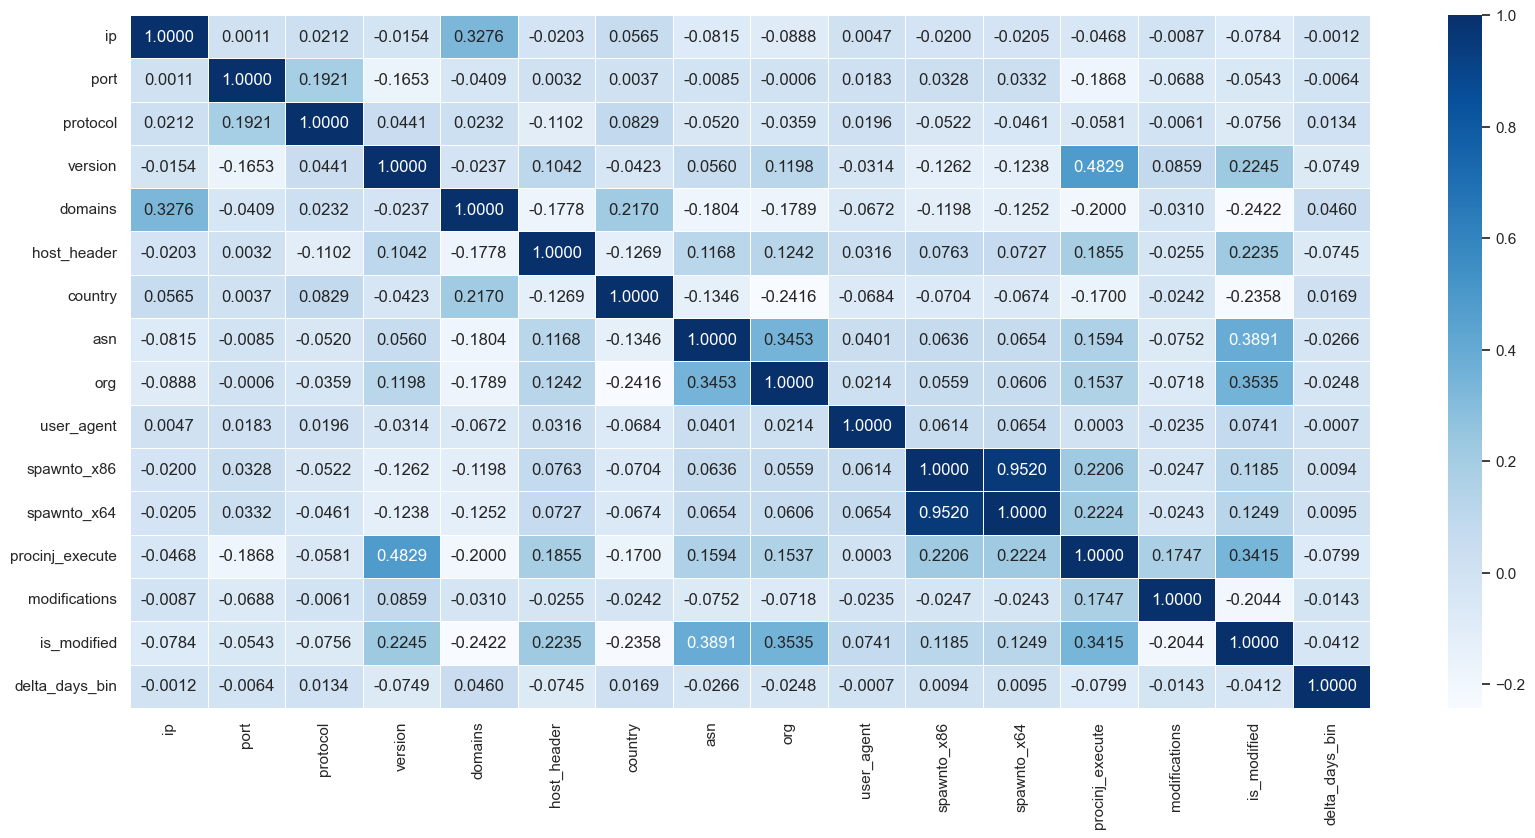

In [1388]:
plt.figure(figsize = (20, 9)) #default pearson
sns.heatmap(df_analysis.corr(), annot = True, cmap = 'Blues', fmt = '.4f',linewidths = 0.6)

In [1389]:
#corr = df_analysis.corr()
#cmap = sns.diverging_palette(1, 20, as_cmap=True)
## Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

## Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(15, 10))
## Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,annot = True,
#            square=True, linewidths=.5, cbar_kws={"shrink": .6});

In [1390]:
# Importing Libraries
from kmodes.kmodes import KModes

In [1391]:
km_cao = KModes(n_clusters=9, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_analysis)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8563, cost: 251706.0
Run 1, iteration: 2/100, moves: 1907, cost: 251698.0
Run 1, iteration: 3/100, moves: 0, cost: 251698.0


In [1392]:
fitClusters_cao

array([0, 1, 1, ..., 7, 2, 2], dtype=uint16)

In [1393]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_analysis.columns

In [1394]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [1395]:
clusterCentroidsDf

,ip,port,protocol,version,domains,host_header,country,asn,org,user_agent,spawnto_x86,spawnto_x64,procinj_execute,modifications,is_modified,delta_days_bin
0,4355,2,2,13,3483,2593,78,163,28,662,193,182,249,15,1,0
1,5406,1,1,16,16066,2593,13,342,563,662,193,182,249,13,0,0
2,8115,1,1,13,18303,2593,13,281,271,780,193,182,249,15,1,0
3,7227,1,1,14,9476,2593,78,139,20,780,193,182,249,1,1,0
4,11797,2,2,3,10546,2593,78,139,20,662,193,182,0,13,0,0
5,8048,2,1,16,4751,2593,48,123,158,780,193,182,249,3,1,0
6,6973,1,1,15,4289,2593,48,75,38,2,193,182,249,16,1,0
7,2430,2,2,14,2460,2593,13,342,563,593,193,182,249,1,1,0
8,10221,2,1,6,662,2593,23,541,479,978,193,182,249,15,1,0


In [1396]:
km_huang = KModes(n_clusters=9, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df_analysis)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5983, cost: 248874.0
Run 1, iteration: 2/100, moves: 3098, cost: 247038.0
Run 1, iteration: 3/100, moves: 702, cost: 247038.0


In [1397]:
fitClusters_huang

array([4, 5, 4, ..., 3, 0, 7], dtype=uint16)

In [1398]:
beacon = []
for num_clusters in list(range(1,9)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_analysis)
    beacon.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 316431.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3553, cost: 293595.0
Run 1, iteration: 2/100, moves: 5, cost: 293595.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4990, cost: 286836.0
Run 1, iteration: 2/100, moves: 104, cost: 286836.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5683, cost: 278915.0
Run 1, iteration: 2/100, moves: 1128, cost: 278907.0
Run 1, iteration: 3/100, moves: 0, cost: 278907.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7400, cost: 264238.0
Run 1, iteration: 2/100, moves: 1589, cost: 264230.0
Run 1, iteration: 3/100, moves: 0, cost: 264230.0
Init: initializing centroids
I

Text(0.5, 1.0, 'Método Elbow')

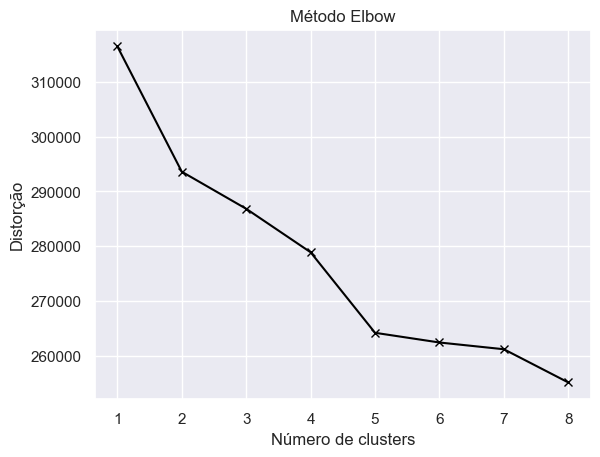

In [1399]:
y = np.array([i for i in range(1,9,1)])
plt.figure_size = (5, 3.8)
plt.plot(y,beacon, 'bx-', color='black')
label = 'Método Elbow'
plt.xlabel('Número de clusters') 
plt.ylabel('Distorção') 

plt.title(label, fontdict=None, pad=None)

In [1269]:
km_cao = KModes(n_clusters=9, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_analysis)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5683, cost: 278915.0
Run 1, iteration: 2/100, moves: 1128, cost: 278907.0
Run 1, iteration: 3/100, moves: 0, cost: 278907.0


In [1270]:
fitClusters_cao

array([0, 1, 1, ..., 0, 2, 2], dtype=uint16)

In [1271]:
df_analysis = df_analysis_copy.reset_index()

In [1272]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_analysis, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [1273]:
combinedDf.head()

,ip,port,protocol,version,domains,host_header,country,asn,org,user_agent,spawnto_x86,spawnto_x64,procinj_execute,modifications,is_modified,delta_days_bin,cluster_predicted
0,81.95.5.146,443,https,"Cobalt Strike 3.6 (Dec 08, 2016)",81.95.5.146,NaN,Germany,201011,AS33891 Netzbetrieb GmbH,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,modified_trial,True,100-2000,0
1,122.116.41.237,80,http,"Cobalt Strike 3.6 (Dec 08, 2016)",122.116.41.237,NaN,Taiwan,3462,Data Communication Business Group,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,normal,False,0-50,1
2,51.255.42.170,80,dns,"Cobalt Strike 3.4 (Jul 29, 2016)","cdn.incdigest.com, freepics.incdigest.com, pro...",NaN,France,16276,OVH SAS,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,0,0,0,normal,False,100-2000,1
3,51.38.187.74,443,https,"Cobalt Strike 3.8 (May 23, 2017)",51.38.187.74,NaN,France,16276,OVH SAS,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,normal,False,0-50,0
4,54.147.59.212,80,http,"Cobalt Strike 3.10 (Dec 11, 2017)",ww2.foodprepsolutions.com,www.imdb.com,United States,14618,AMAZON-AES,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,normal,False,0-50,1


In [938]:
import csv
#export_df.to_csv("iocs-export_sem_index.csv",index=False)
#User agent
#correlação com algum dataset de dominio (com isso é possivel validar se foi utilizado dominio temporario, alexa top1m)
#quantidade de dias que um beacon ficou disponivel na internet
#analise do IP (avaliar se tem alguma API disponivel no trabalho)


combinedDf.to_csv("cluster5-export-bin.csv", sep=";", quoting=csv.QUOTE_ALL, index=False)

In [939]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]
cluster_4 = combinedDf[combinedDf['cluster_predicted'] == 4]

In [1196]:
finalCluster = pd.read_csv("clusterfinal.csv",delimiter=';', skiprows=0, low_memory=False)

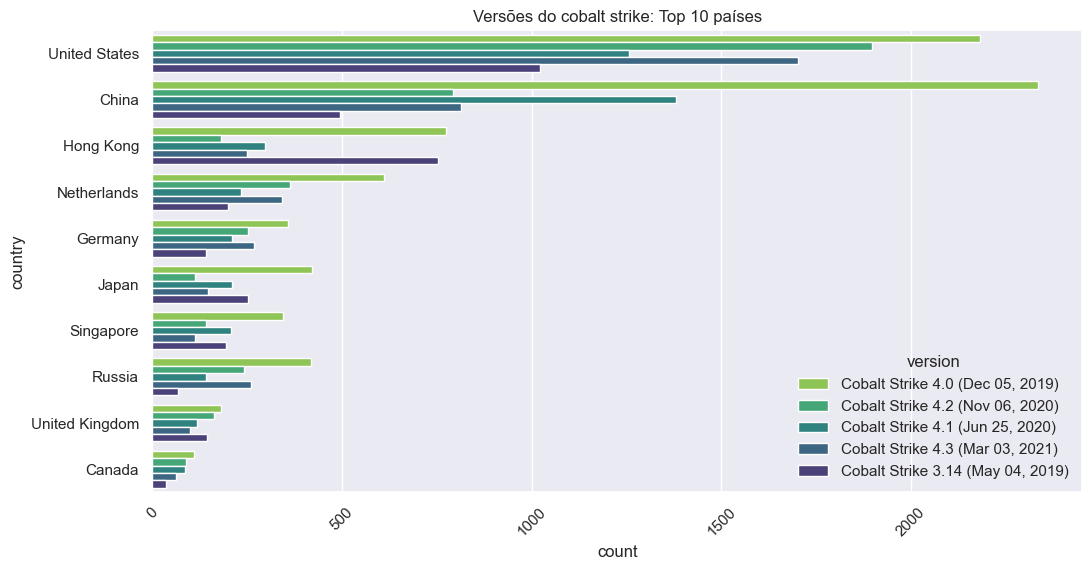

In [1162]:
plt.subplots(figsize = (12,6))
plt.xticks(rotation=45)

hue_order = finalCluster['version'].value_counts().iloc[:5].index


sns.countplot(y=finalCluster['country'],order=finalCluster['country'].value_counts().iloc[:10].index,hue_order=hue_order, hue=finalCluster['version'],palette='viridis_r').set(title='Versões do cobalt strike: Top 10 países')
plt.show()




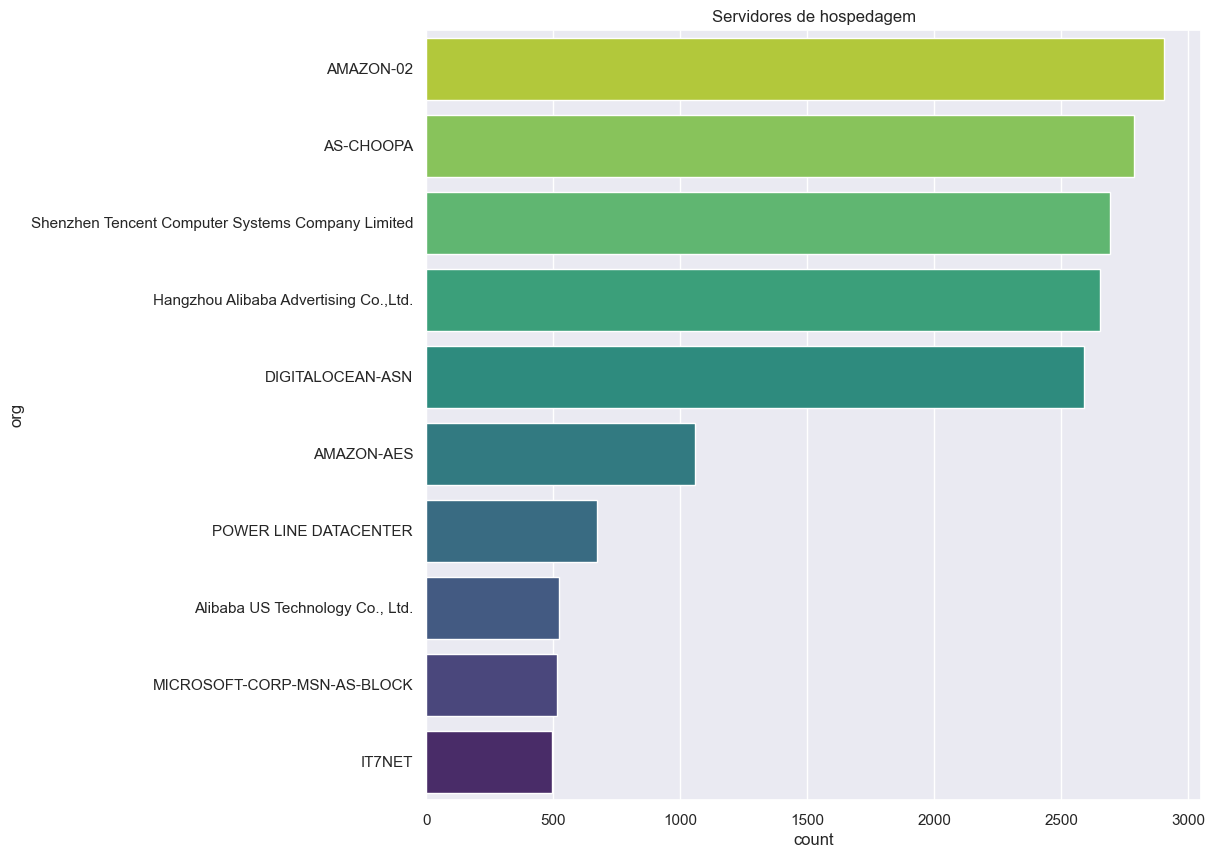

In [462]:
plt.subplots(figsize = (10,10))
#plt.xticks(rotation=45)

sns.countplot(y=combinedDf['org'],order=combinedDf['org'].value_counts().iloc[:10].index,palette='viridis_r').set(title='Servidores de hospedagem')
plt.show()

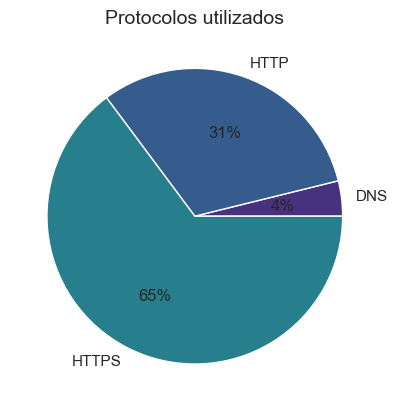

In [583]:

# importing libraries
import matplotlib.pyplot as plt
import seaborn
  

# declaring exploding pie
explode = [0, 0.1, 0, 0, 0]
# define Seaborn color palette to use
palette_color = seaborn.color_palette('viridis')
labels = list(combinedDf["protocol"])
keys = ['DNS', 'HTTP', 'HTTPS']


#print(labels)
# plotting data on chart
plt.pie(combinedDf.groupby(df["protocol"])["port"].sum(), colors=palette_color, autopct='%.0f%%', labels=keys)
plt.title("Protocolos utilizados", fontsize=14);

# displaying chart
plt.show()

<AxesSubplot:xlabel='count', ylabel='spawnto_x64'>

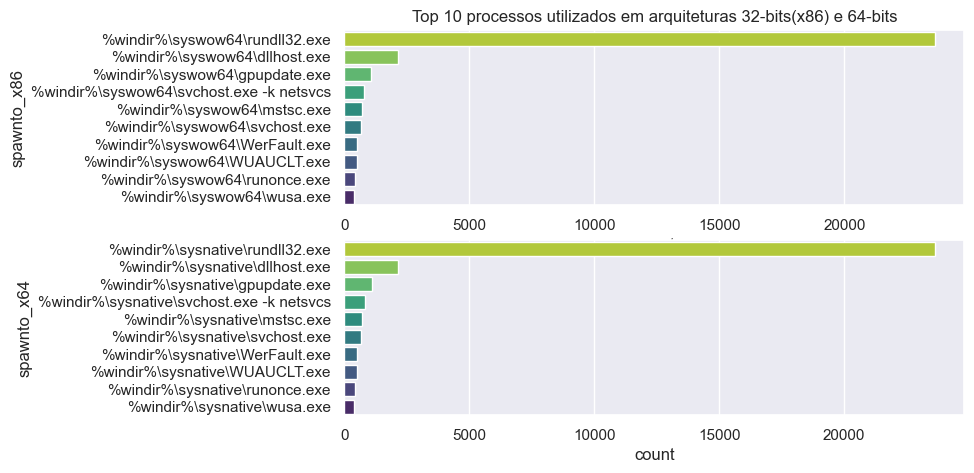

In [353]:


f, axs = plt.subplots(2,1,figsize = (8,5))

sns.countplot(y=combinedDf['spawnto_x86'],order=combinedDf['spawnto_x86'].value_counts().iloc[:10].index,ax=axs[0],palette='viridis_r').set(title='Top 10 processos utilizados em arquiteturas 32-bits(x86) e 64-bits')
sns.countplot(y=combinedDf['spawnto_x64'],order=combinedDf['spawnto_x64'].value_counts().iloc[:10].index,ax=axs[1],palette='viridis_r')


In [354]:

combinedDfProc = combinedDf[combinedDf["procinj_execute"].str.contains('0') == False]
combinedDfProc.head()


,ip,port,protocol,version,domains,host_header,country,asn,org,user_agent,spawnto_x86,spawnto_x64,procinj_execute,modifications,is_modified,delta_days_bin,cluster_predicted
3270,54.172.29.81,443,https,"Cobalt Strike 3.14 (May 04, 2019)",lakewoodmedical.net,www.amazon.com,United States,14618,AMAZON-AES,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,%windir%\syswow64\WerFault.exe,%windir%\sysnative\WerFault.exe,"CreateThread, SetThreadContext, CreateRemoteTh...",normal,False,0-50,4
3271,3.8.199.110,443,https,"Cobalt Strike 3.14 (May 04, 2019)","dev.teams.microsoft.com, do.skype.com, join.se...",autodiscover.azureedge.net,United Kingdom,16509,AMAZON-02,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,%windir%\syswow64\searchindexer.exe,%windir%\sysnative\searchindexer.exe,"CreateThread ""ntdll!RtlUserThreadStart"", NtQue...",normal,False,0-50,4
3272,35.222.117.39,443,https,"Cobalt Strike 3.14 (May 04, 2019)","www.cnn.com, www.nytimes.com",praetorian-km.com,United States,15169,GOOGLE,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,"CreateThread, SetThreadContext, CreateRemoteTh...",normal,False,0-50,4
3273,54.172.42.32,80,http,"Cobalt Strike 3.14 (May 04, 2019)",da3yk1t848c6k.cloudfront.net,da3yk1t848c6k.cloudfront.net,United States,14618,AMAZON-AES,Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:1...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,"CreateThread, SetThreadContext, CreateRemoteTh...",normal,False,100-2000,1
3276,205.209.174.66,443,https,"Cobalt Strike 3.14 (May 04, 2019)",205.209.174.66,NaN,United States,23338,ASN-DCS-01,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,"CreateThread, SetThreadContext, CreateRemoteTh...",normal,False,50-100,4


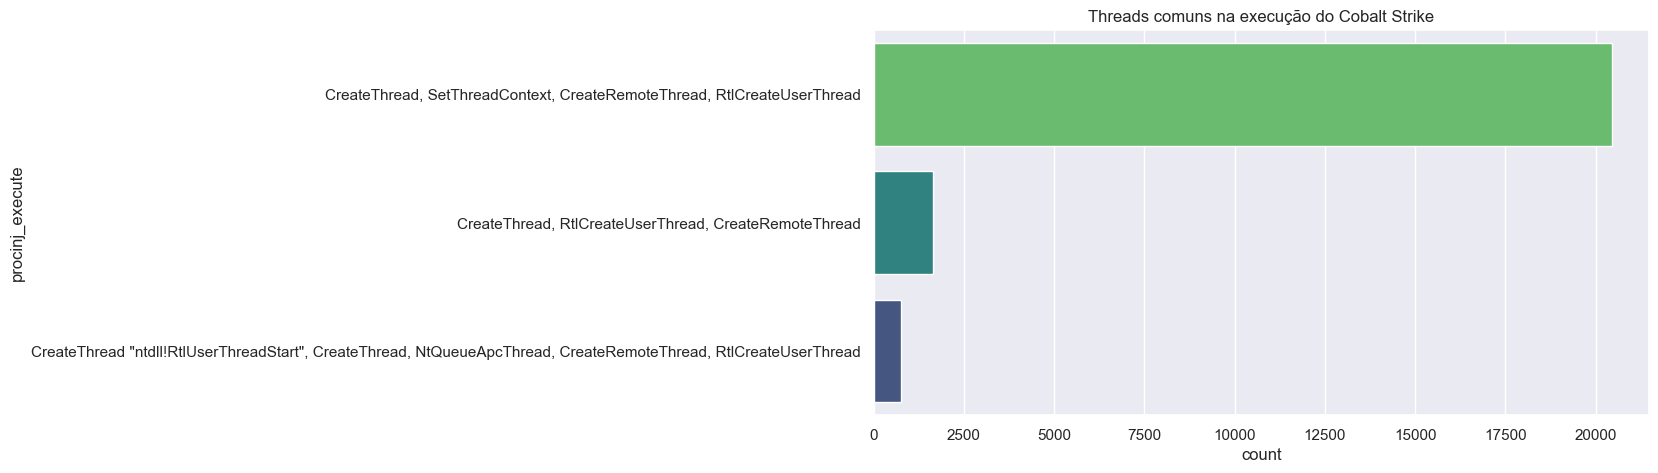

In [973]:

plt.subplots(figsize = (10,5))
#plt.xticks(rotation=45)


sns.countplot(y=combinedDfProc['procinj_execute'],order=combinedDfProc['procinj_execute'].value_counts().iloc[:3].index,palette='viridis_r').set(title='Threads comuns na execução do Cobalt Strike')
plt.show()

<AxesSubplot:xlabel='country', ylabel='Density'>

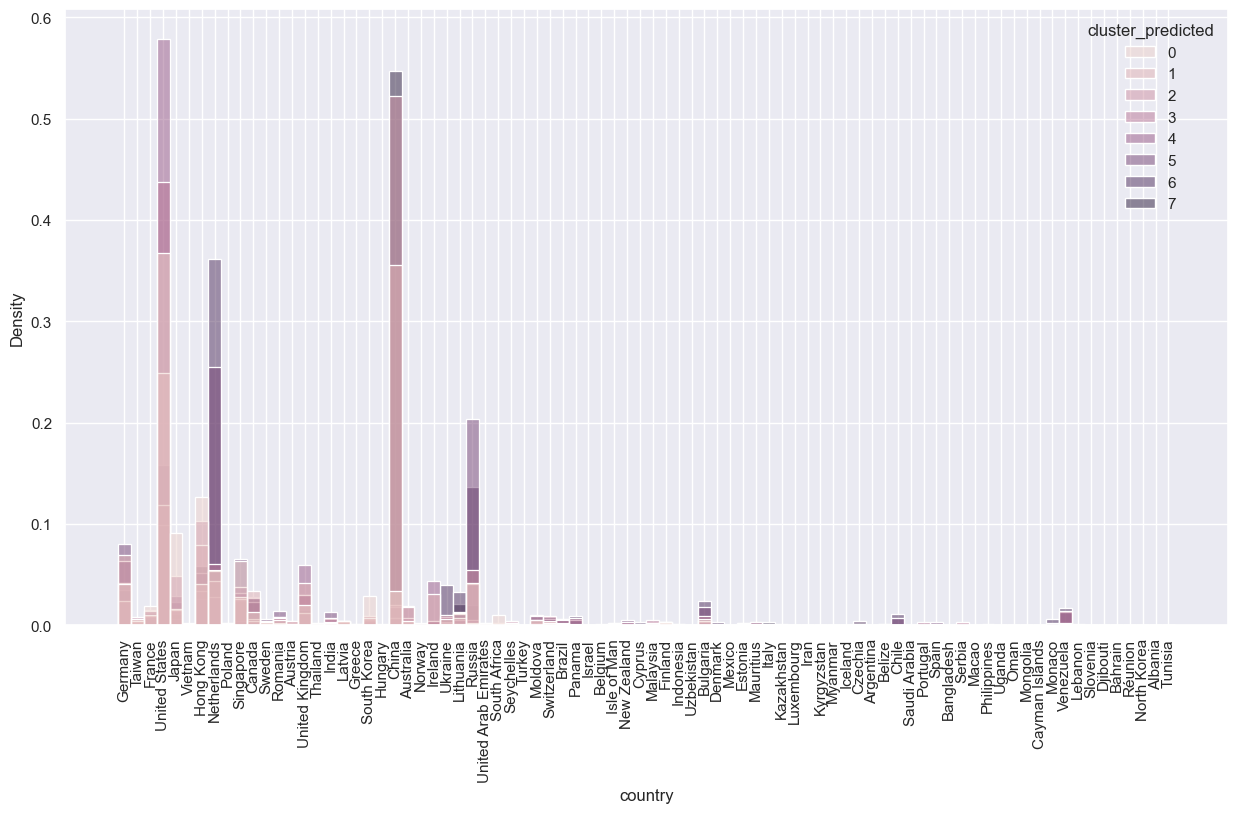

In [356]:
plt.subplots(figsize = (15,8))
plt.xticks(rotation=90)


sns.histplot(
    combinedDf, x="country", hue="cluster_predicted", element="bars", stat="density", common_norm=False,
)

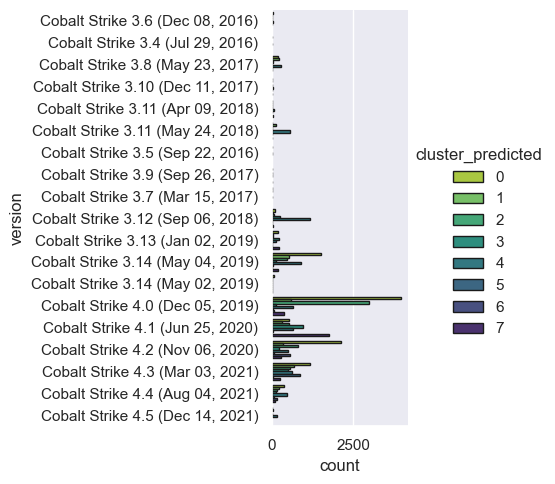

In [357]:
sns.catplot(
    data=combinedDf, y='version', hue="cluster_predicted", kind="count",
    palette="viridis_r", edgecolor=".10"
)


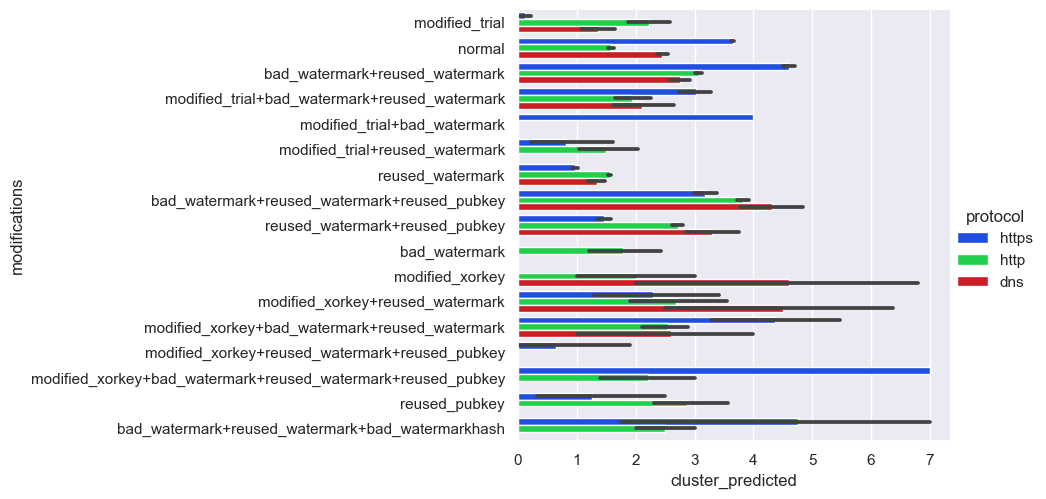

In [369]:
sns.catplot(
    data=combinedDf, x="cluster_predicted", y="modifications", hue="protocol", kind="bar",
)

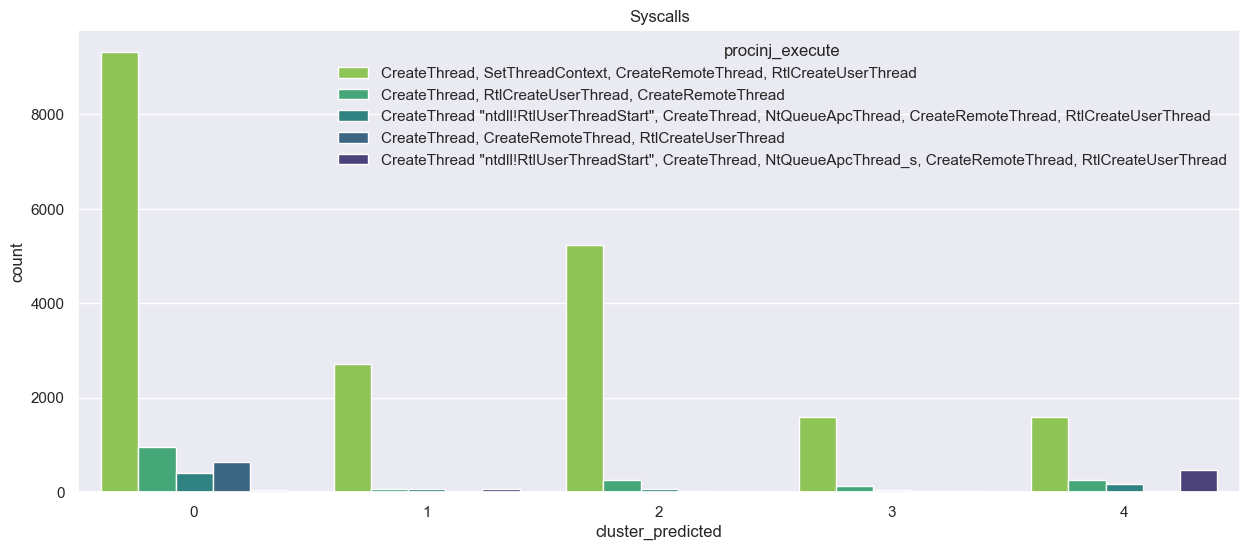

In [963]:
plt.subplots(figsize = (15,6))

hue_order = combinedDfProc['procinj_execute'].value_counts().iloc[:5].index

sns.countplot(palette='viridis_r', x=combinedDf['cluster_predicted'],hue_order=hue_order, hue=combinedDf['procinj_execute']).set(title='Syscalls')
#sns.countplot(palette='viridis_r', x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().iloc[:5].index,hue_order=hue_order, hue=combinedDf['procinj_execute']).set(title='Syscalls')

plt.show()



#import seaborn as sns
#titanic = sns.load_dataset("titanic")
#sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d",
 #             order=titanic.deck.value_counts().iloc[:3].index)

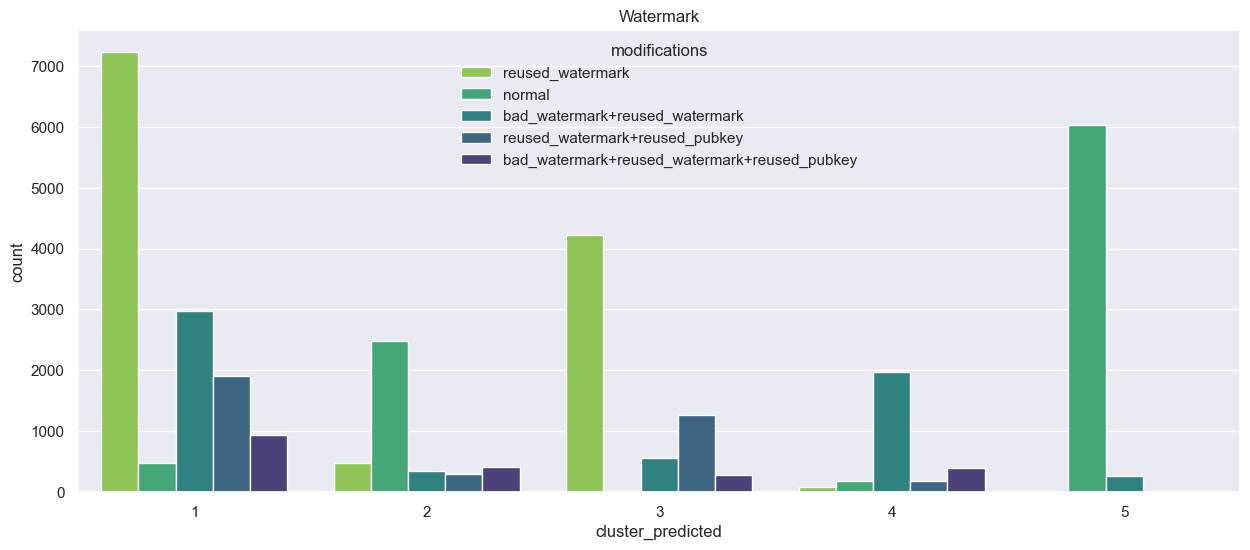

In [1163]:
plt.subplots(figsize = (15,6))

hue_order = finalCluster['modifications'].value_counts().iloc[:5].index

sns.countplot(palette='viridis_r', x=finalCluster['cluster_predicted'], hue_order=hue_order, hue=finalCluster['modifications']).set(title='Watermark')
plt.show()




#import seaborn as sns
#titanic = sns.load_dataset("titanic")
#sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d",
 #             order=titanic.deck.value_counts().iloc[:3].index)

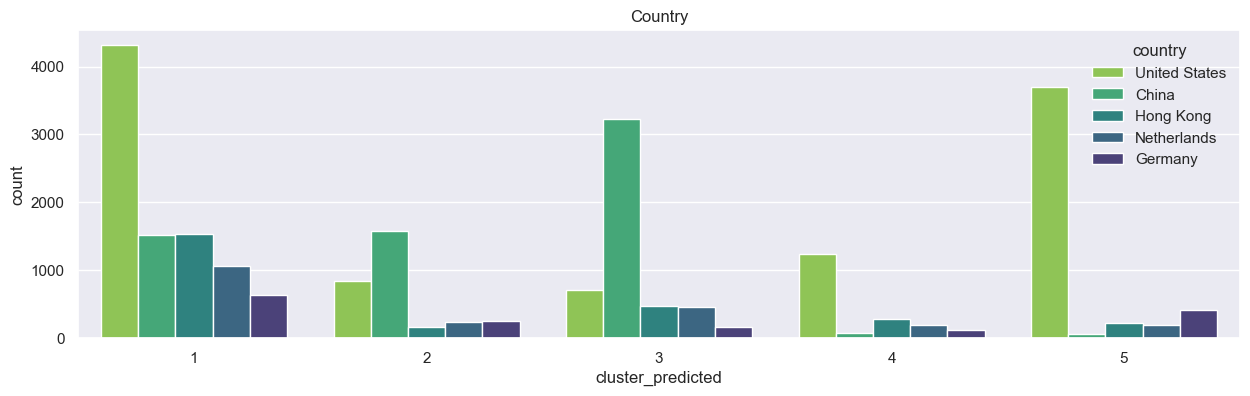

In [956]:
plt.subplots(figsize = (15,4))

hue_order = finalCluster['country'].value_counts().iloc[:5].index

sns.countplot(palette='viridis_r', x=finalCluster['cluster_predicted'],hue_order=hue_order, hue=finalCluster['country']).set(title='Country')
plt.show()


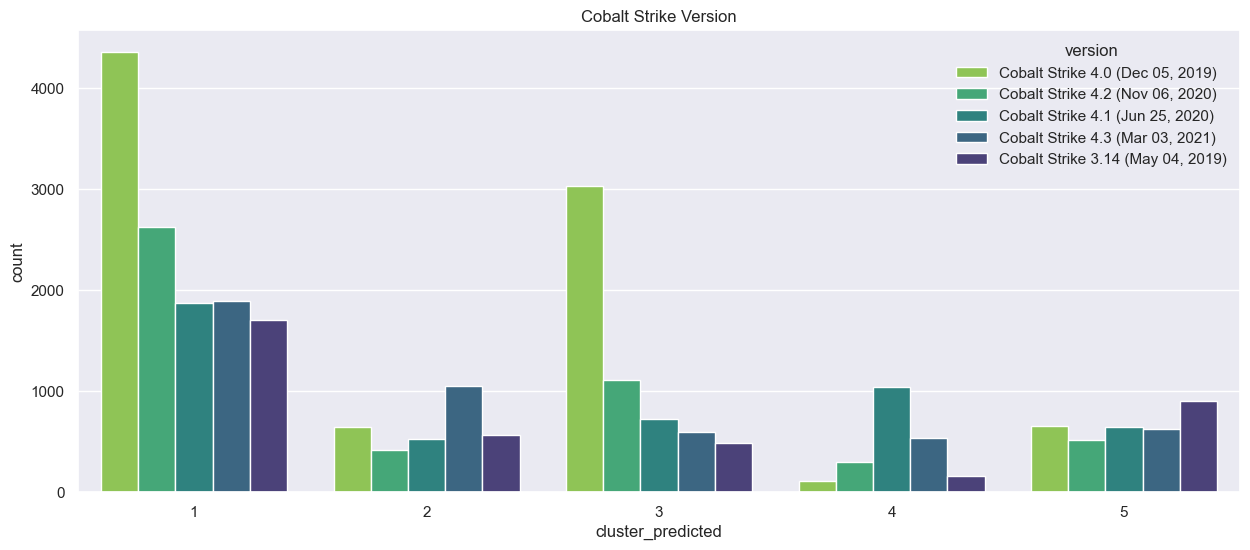

In [955]:
plt.subplots(figsize = (15,6))

hue_order = finalCluster['version'].value_counts().iloc[:5].index

sns.countplot(palette='viridis_r', x=finalCluster['cluster_predicted'],hue_order=hue_order, hue=finalCluster['version']).set(title='Cobalt Strike Version')
#remove order
#sns.countplot(palette='viridis_r', x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().iloc[:5].index,hue_order=hue_order, hue=combinedDf['version']).set(title='Cobalt Strike Version')

plt.show()


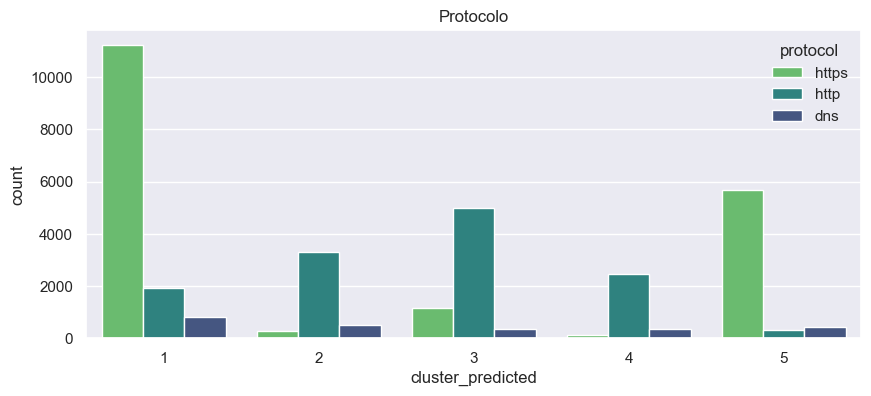

In [954]:
plt.subplots(figsize = (10,4))

hue_order = finalCluster['protocol'].value_counts().iloc[:5].index

sns.countplot(palette='viridis_r', x=finalCluster['cluster_predicted'],hue_order=hue_order, hue=finalCluster['protocol']).set(title='Protocolo')
#remove order
#sns.countplot(palette='viridis_r', x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().iloc[:5].index,hue_order=hue_order, hue=combinedDf['version']).set(title='Cobalt Strike Version')

plt.show()


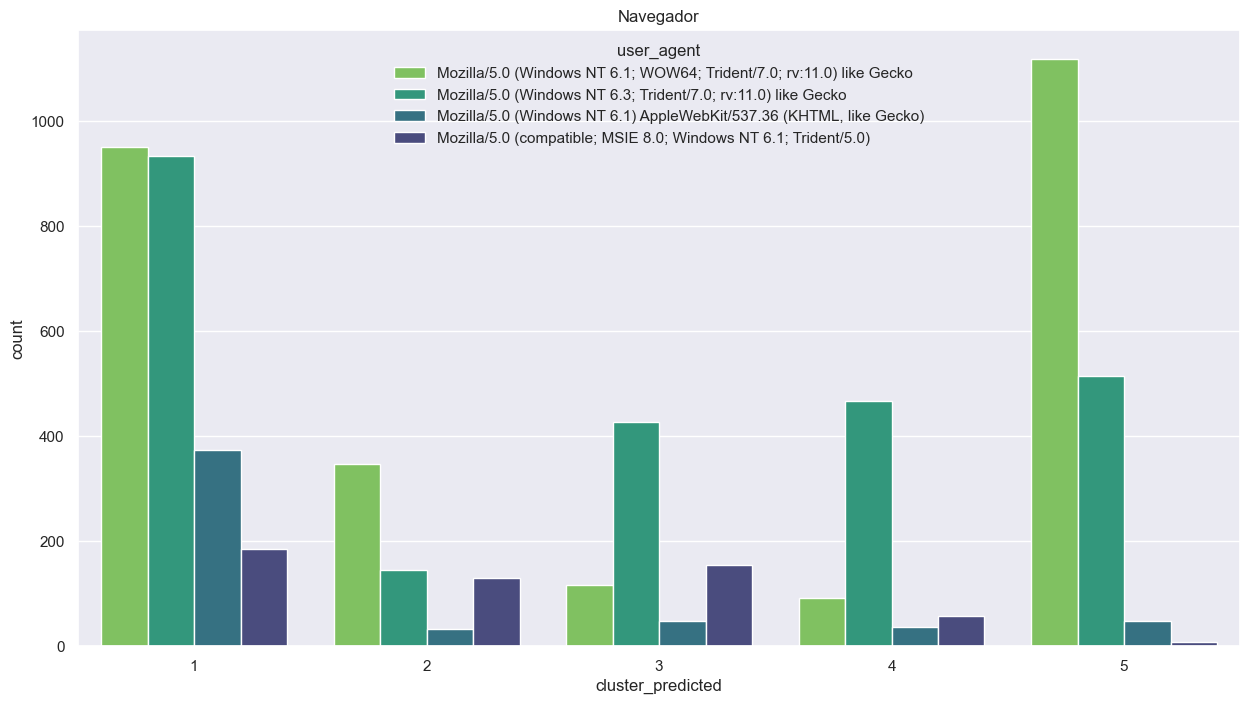

In [1164]:
plt.subplots(figsize = (15,8))

hue_order = finalCluster['user_agent'].value_counts().iloc[:4].index

sns.countplot(palette='viridis_r', x=finalCluster['cluster_predicted'],hue_order=hue_order, hue=finalCluster['user_agent']).set(title='Navegador')
#remove order
#sns.countplot(palette='viridis_r', x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().iloc[:5].index,hue_order=hue_order, hue=combinedDf['version']).set(title='Cobalt Strike Version')

plt.show()


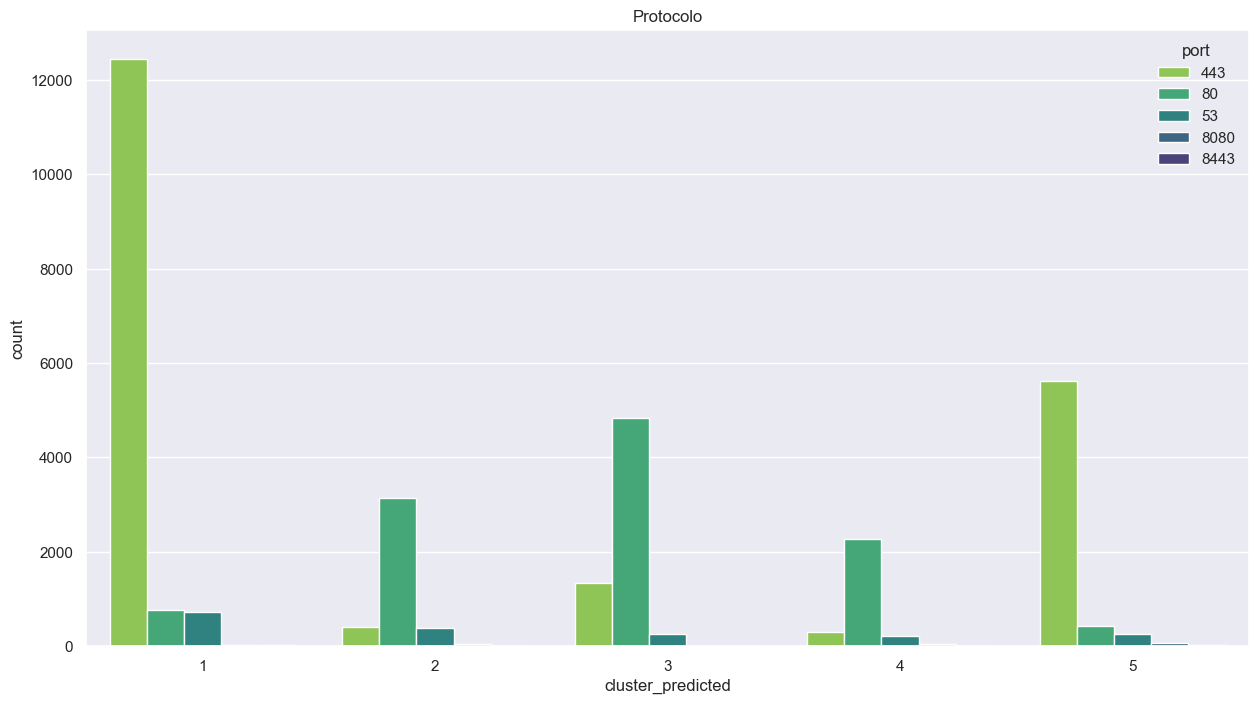

In [952]:
plt.subplots(figsize = (15,8))

hue_order = finalCluster['port'].value_counts().iloc[:5].index

sns.countplot(palette='viridis_r', x=finalCluster['cluster_predicted'],hue_order=hue_order, hue=finalCluster['port']).set(title='Protocolo')
#remove order
#sns.countplot(palette='viridis_r', x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().iloc[:5].index,hue_order=hue_order, hue=combinedDf['version']).set(title='Cobalt Strike Version')

plt.show()


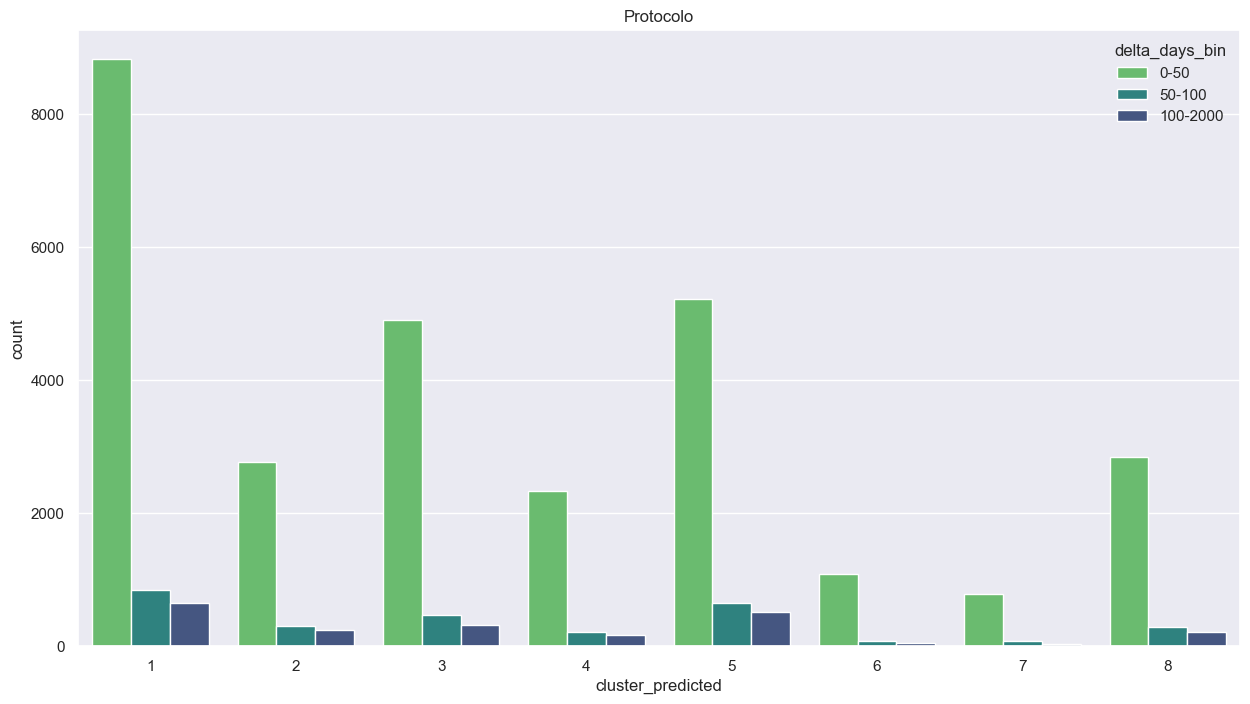

In [499]:
plt.subplots(figsize = (15,8))

hue_order = finalCluster['delta_days_bin'].value_counts().iloc[:4].index

sns.countplot(palette='viridis_r', x=finalCluster['cluster_predicted'],hue_order=hue_order, hue=finalCluster['delta_days_bin']).set(title='Protocolo')
#remove order
#sns.countplot(palette='viridis_r', x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().iloc[:5].index,hue_order=hue_order, hue=combinedDf['version']).set(title='Cobalt Strike Version')

plt.show()


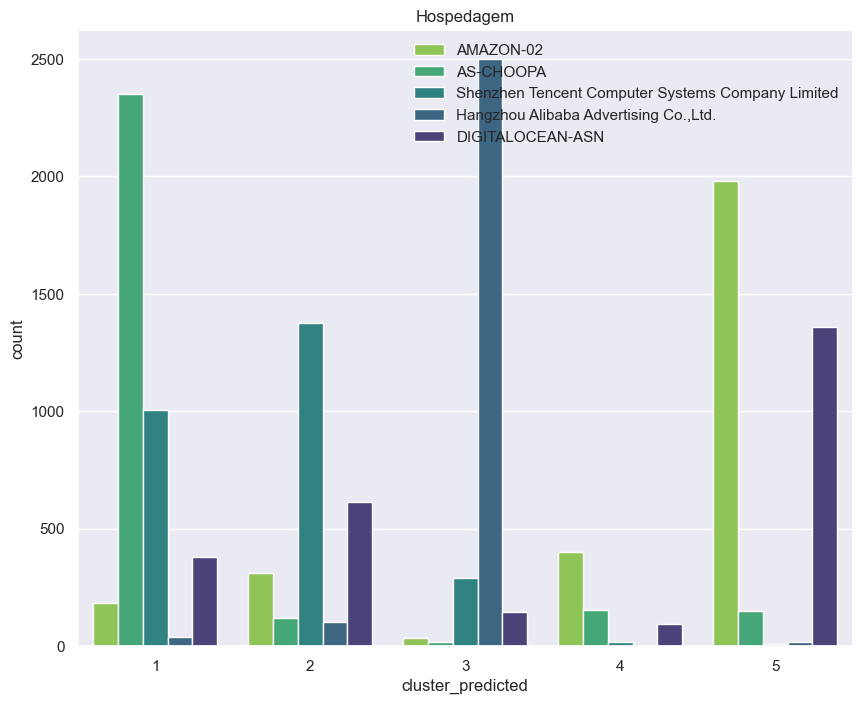

In [1165]:
plt.subplots(figsize = (10,8))

hue_order = finalCluster['org'].value_counts().iloc[:5].index
sns.countplot(palette='viridis_r', x=finalCluster['cluster_predicted'],hue_order=hue_order, hue=finalCluster['org']).set(title='Hospedagem')
#remove order
#sns.countplot(palette='viridis_r', x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().iloc[:5].index,hue_order=hue_order, hue=combinedDf['version']).set(title='Cobalt Strike Version')
plt.legend(loc='upper right')

plt.show()


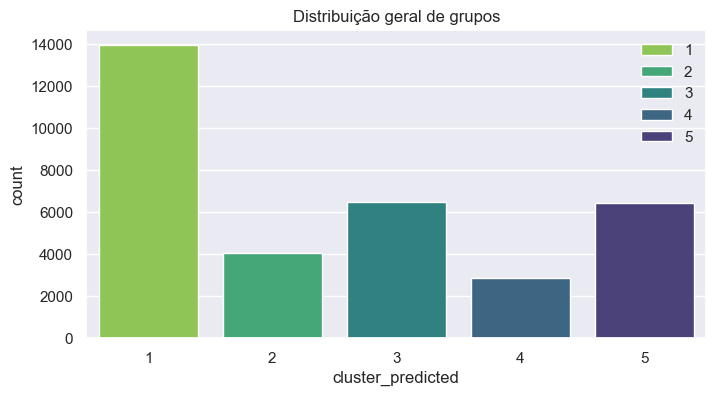

In [1166]:
plt.subplots(figsize = (8,4))

plt.style.use('seaborn-bright')

sns.countplot(dodge=False, palette='viridis_r', x=finalCluster['cluster_predicted'], hue=finalCluster['cluster_predicted']).set(title='Distribuição geral de grupos')
#remove order
plt.legend(loc='upper right')

#sns.countplot(palette='viridis_r', x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().iloc[:5].index,hue_order=hue_order, hue=combinedDf['version']).set(title='Cobalt Strike Version')

plt.show()


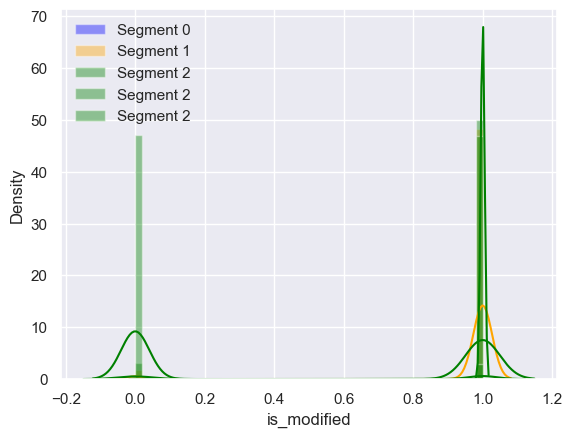

In [1236]:
sns.distplot(finalCluster.loc[finalCluster['cluster_predicted'] == 0]['is_modified'] , color="blue", label="Segment 0")
sns.distplot(finalCluster.loc[finalCluster['cluster_predicted'] == 1]['is_modified'] , color="orange", label="Segment 1")
sns.distplot(finalCluster.loc[finalCluster['cluster_predicted'] == 3]['is_modified'] , color="green", label="Segment 2")
sns.distplot(finalCluster.loc[finalCluster['cluster_predicted'] == 4]['is_modified'] , color="green", label="Segment 2")
sns.distplot(finalCluster.loc[finalCluster['cluster_predicted'] == 5]['is_modified'] , color="green", label="Segment 2")

plt.legend();

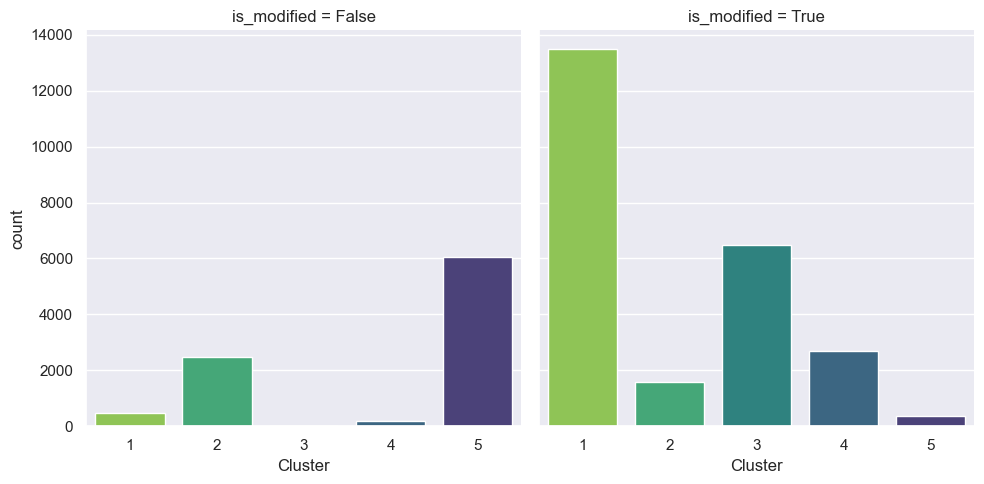

In [950]:
sns.set()

#hue_order = finalCluster['org'].value_counts().iloc[:5].index

#combinedDf['cluster_predicted'].value_counts().iloc[:5].index

g = sns.catplot(data=finalCluster, x='cluster_predicted', col='is_modified', sharey=True, palette='viridis_r', kind='count')
g.set(xlabel='Cluster')

plt.tight_layout()
plt.show()

#sns.set(style="darkgrid", context="talk")
#plt.style.use("dark_background")
#x=combinedDf['country']

<AxesSubplot:xlabel='cluster_predicted', ylabel='count'>

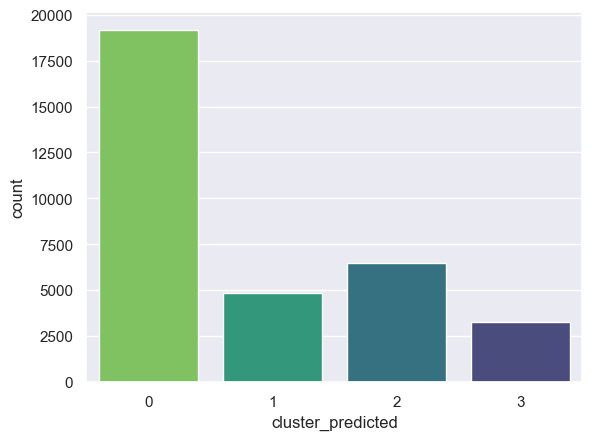

In [1274]:
df_plot = combinedDf[combinedDf['is_modified']]
sns.countplot(x='cluster_predicted', data=combinedDf, palette='viridis_r')


#With a dataframe df having a column mydata containing rows with text "No Information", 
#you can remove the rows while passing the data argument to the countplot method like this:

#sns.countplot(x="mydata", data=df[-(df.mydata == 'No Information')])

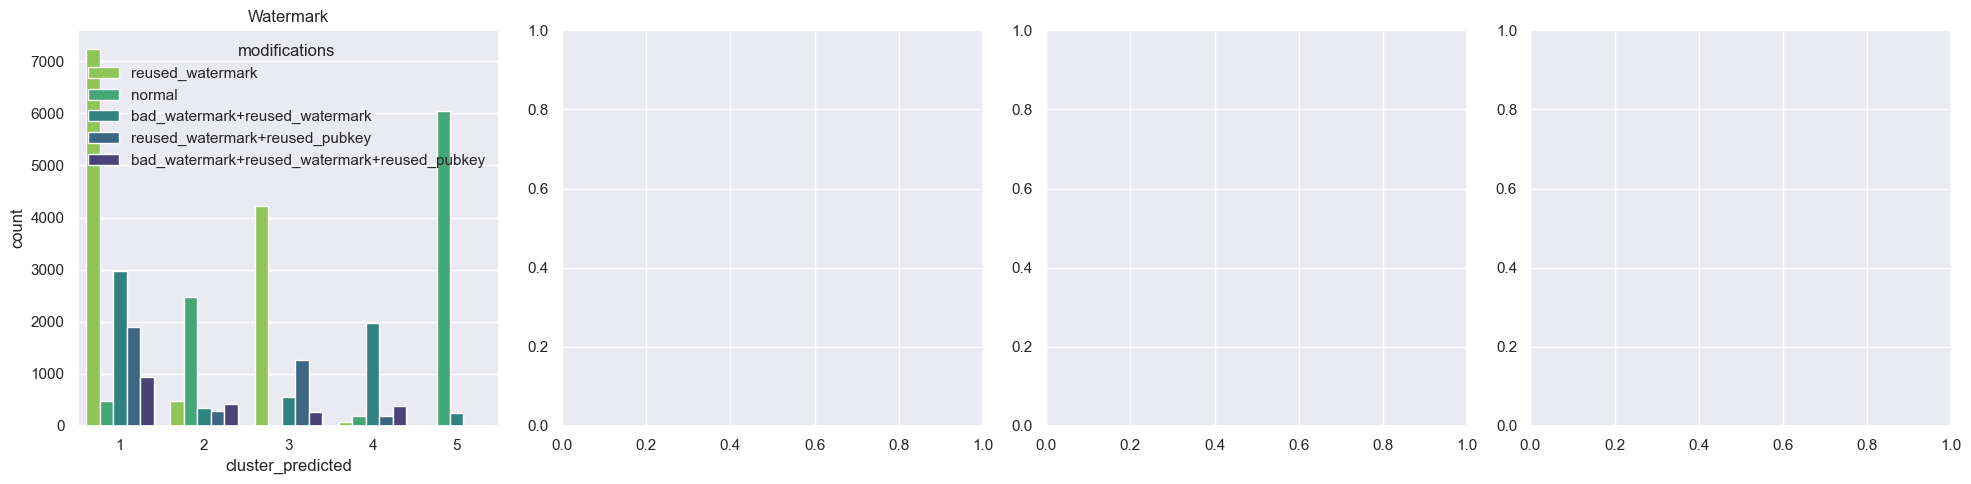

In [1087]:
f, axs = plt.subplots(1,4,figsize = (20,5))

hue_order = finalCluster['modifications'].value_counts().iloc[:5].index


sns.countplot(x=finalCluster['cluster_predicted'],hue_order=hue_order, hue=combinedDf['modifications'],ax=axs[0],palette='viridis_r').set(title='Watermark')
#sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['version'],ax=axs[0],palette='rainbow')
#sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['protocol'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1],palette='rainbow')
#sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['protocol'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1],palette='rainbow')


plt.tight_layout()
plt.show()




#import seaborn as sns
#titanic = sns.load_dataset("titanic")
#sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d",
 #             order=titanic.deck.value_counts().iloc[:3].index)

In [ ]:
df_cluster1 = combinedDf.query("cluster_predicted == 1")
df_cluster0 = combinedDf.query("cluster_predicted == 0")

df_cluster1 = combinedDf.query('cluster_predicted == 1 & spawnto_x86.str.contains("windir")')
#df_cluster1 = combinedDf.query('cluster_predicted == 1 & port == 80')

df_cluster1.head()

#df.query('Salary_in_1000 >= 100 & Age < 60 & FT_Team.str.startswith("S").values')
#df[(df['Salary_in_1000']>=100) & (df['Age']<60) & df['FT_Team'].str.startswith('S')][['Name','Age','Salary_in_1000']]
#df[df.eval("Salary_in_1000>=100 & (Age <60) & FT_Team.str.startswith('S').values")]
#https://kanoki.org/2020/01/21/pandas-dataframe-filter-with-multiple-conditions/

,ip,port,protocol,version,domains,host_header,delta_days,country,asn,org,user_agent,spawnto_x86,spawnto_x64,procinj_execute,modifications,is_modified,cluster_predicted
1,122.116.41.237,80,http,"Cobalt Strike 3.6 (Dec 08, 2016)",122.116.41.237,NaN,0,Taiwan,3462,Data Communication Business Group,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,normal,False,1
4,54.147.59.212,80,http,"Cobalt Strike 3.10 (Dec 11, 2017)",ww2.foodprepsolutions.com,www.imdb.com,43,United States,14618,AMAZON-AES,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,normal,False,1
25,198.50.234.107,80,http,"Cobalt Strike 3.6 (Dec 08, 2016)",167.114.44.146,www.amazon.com,43,Canada,16276,OVH SAS,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,modified_trial,True,1
29,77.81.7.90,80,dns,"Cobalt Strike 3.10 (Dec 11, 2017)",auth-alstom.com,NaN,186,Sweden,42695,City Network International AB,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,normal,False,1
36,54.164.207.117,80,http,"Cobalt Strike 3.10 (Dec 11, 2017)",ec2-54-164-207-117.compute-1.amazonaws.com,NaN,282,United States,14618,AMAZON-AES,Mozilla/6.0 (Windows NT 6.1; WOW64; Trident/7....,%windir%\syswow64\rundll32.exe,%windir%\sysnative\rundll32.exe,0,normal,False,1


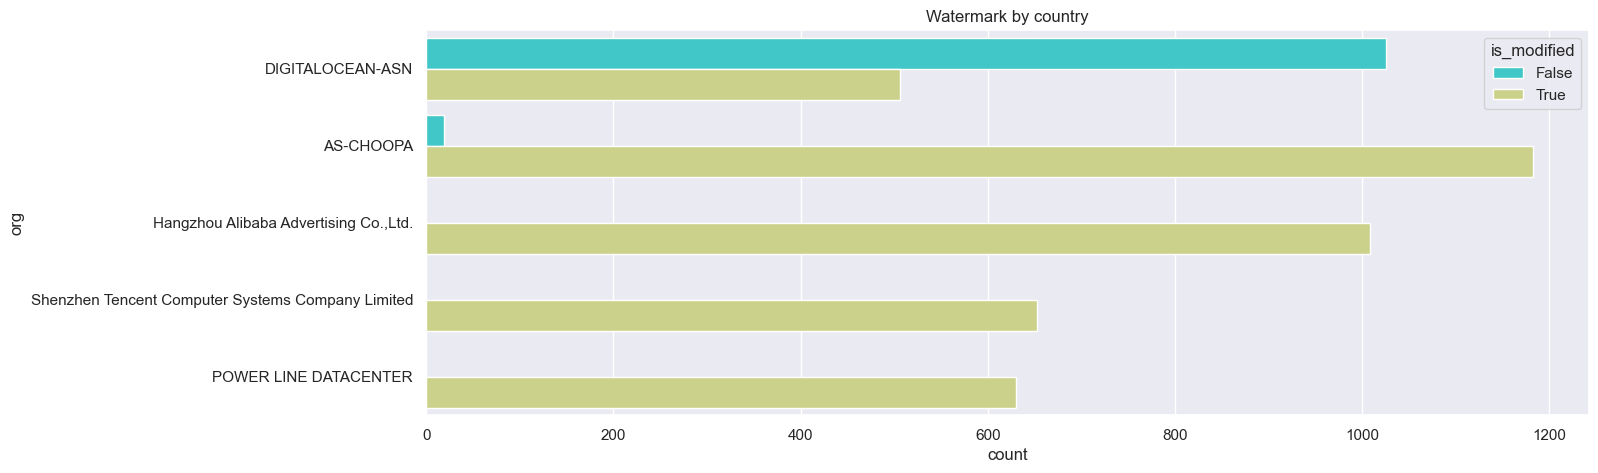

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(palette='rainbow', y=cluster_0['org'],order=cluster_0['org'].value_counts().iloc[:5].index,hue=cluster_0['is_modified']).set(title='Watermark by country')
plt.show()


In [1123]:
strangeuser = finalCluster[finalCluster["user_agent"].str.contains('Mozilla') == False]


In [1124]:
strangeuser1 = strangeuser[strangeuser["user_agent"].str.contains('0') == False]


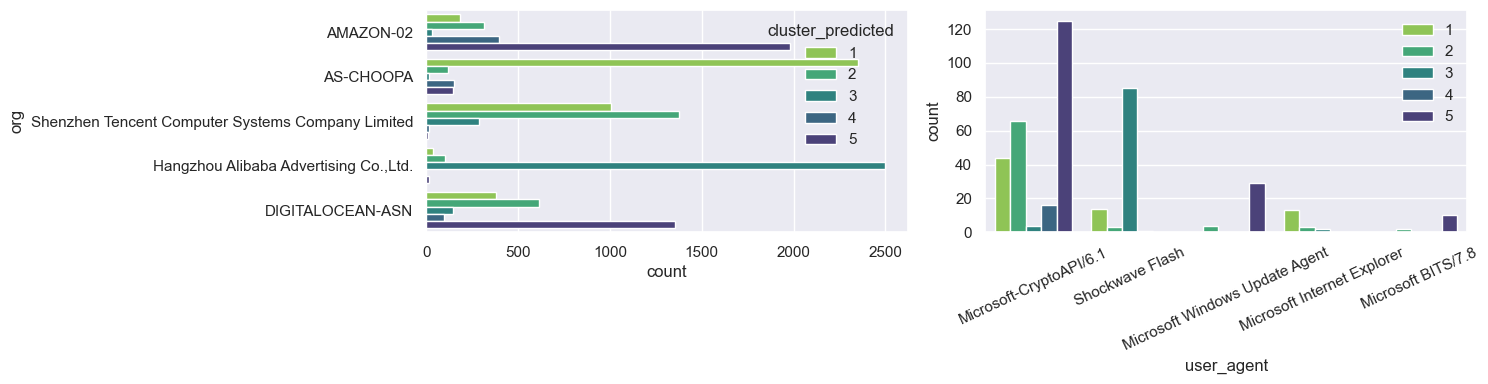

In [1314]:
f, axs = plt.subplots(1,2,figsize = (15,4))


sns.countplot(palette='viridis_r', y=finalCluster['org'],order=finalCluster['org'].value_counts()[:5].index,hue=finalCluster['cluster_predicted'],ax=axs[0])
plt.xticks(rotation=25)
sns.countplot(palette='viridis_r', x=strangeuser1['user_agent'],order=strangeuser1['user_agent'].value_counts()[:5].index,hue=finalCluster['cluster_predicted'],ax=axs[1])


#sns.countplot(x=finalCluster['cluster_predicted'], order=finalCluster['user_agent'].value_counts()[:5].index,hue=combinedDf['cluster_predicted'],ax=axs[2])
plt.legend(loc = 'upper right')

plt.tight_layout()
plt.show()

In [1205]:
processx86 = finalCluster[finalCluster["spawnto_x86"].str.contains('windir') == False]


In [1207]:
pprocessx86 = processx86[finalCluster["spawnto_x86"].str.contains('explore') == False]


In [1212]:
ppprocessx86 = pprocessx86[finalCluster["spawnto_x86"].str.contains('0') == False]


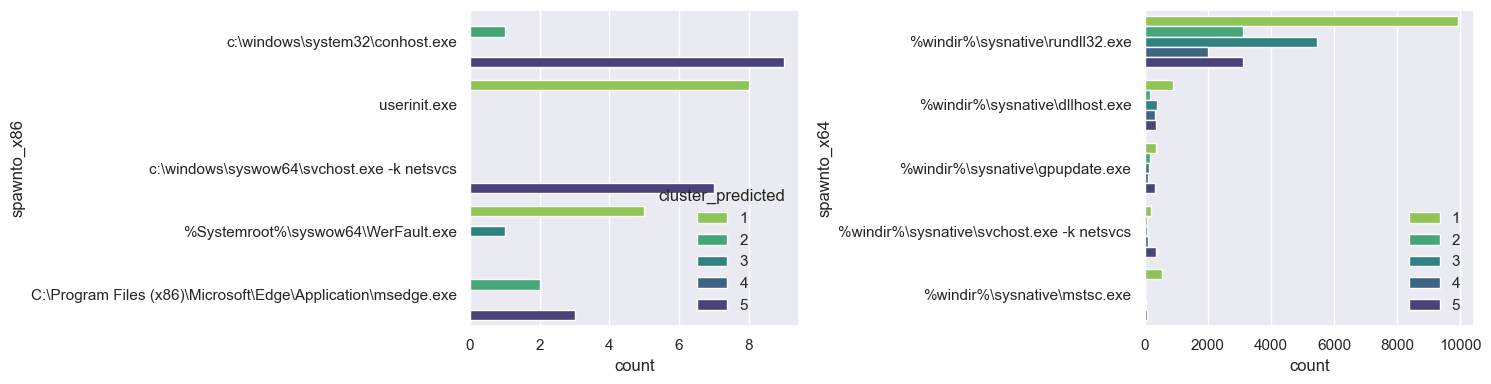

In [1224]:
f, axs = plt.subplots(1,2,figsize = (15,4))


sns.countplot(palette='viridis_r', y=ppprocessx86['spawnto_x86'],order=ppprocessx86['spawnto_x86'].value_counts()[:5].index,hue=finalCluster['cluster_predicted'],ax=axs[0])
sns.countplot(palette='viridis_r', y=finalCluster['spawnto_x64'],order=finalCluster['spawnto_x64'].value_counts()[:5].index,hue=finalCluster['cluster_predicted'],ax=axs[1])


#sns.countplot(x=finalCluster['cluster_predicted'], order=finalCluster['user_agent'].value_counts()[:5].index,hue=combinedDf['cluster_predicted'],ax=axs[2])
plt.legend(loc = 'lower right')

plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Cluster 5')]

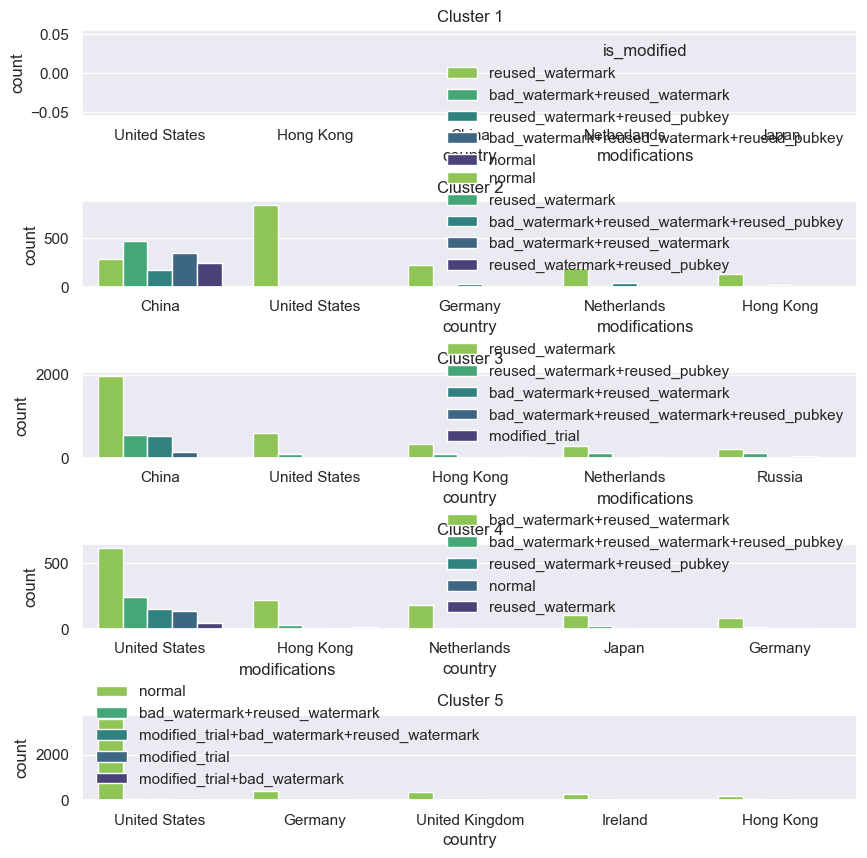

In [1297]:


f, axs = plt.subplots(5,1,figsize = (10,10))
plt.subplots_adjust(hspace = 1)

hue_order0 = cluster_0['modifications'].value_counts().iloc[:5].index
hue_order1 = cluster_1['modifications'].value_counts().iloc[:5].index
hue_order2 = cluster_2['modifications'].value_counts().iloc[:5].index
hue_order3 = cluster_3['modifications'].value_counts().iloc[:5].index
hue_order4 = cluster_4['modifications'].value_counts().iloc[:5].index


sns.countplot(x=cluster_0['country'],order=cluster_0['country'].value_counts().iloc[:5].index,ax=axs[0],palette='viridis_r',hue_order=hue_order0, hue=cluster_0['is_modified']).set(title='Cluster 1')
sns.countplot(x=cluster_1['country'],order=cluster_1['country'].value_counts().iloc[:5].index,ax=axs[1],palette='viridis_r',hue_order=hue_order1, hue=cluster_1['modifications']).set(title='Cluster 2')
sns.countplot(x=cluster_2['country'],order=cluster_2['country'].value_counts().iloc[:5].index,ax=axs[2],palette='viridis_r',hue_order=hue_order2, hue=cluster_2['modifications']).set(title='Cluster 3')
sns.countplot(x=cluster_3['country'],order=cluster_3['country'].value_counts().iloc[:5].index,ax=axs[3],palette='viridis_r',hue_order=hue_order3, hue=cluster_3['modifications']).set(title='Cluster 4')
sns.countplot(x=cluster_4['country'],order=cluster_4['country'].value_counts().iloc[:5].index,ax=axs[4],palette='viridis_r',hue_order=hue_order4, hue=cluster_4['modifications']).set(title='Cluster 5')





In [509]:
cluster_1 = finalCluster[finalCluster['cluster_predicted'] == 1]
cluster_2 = finalCluster[finalCluster['cluster_predicted'] == 2]
cluster_3 = finalCluster[finalCluster['cluster_predicted'] == 3]
cluster_4 = finalCluster[finalCluster['cluster_predicted'] == 4]
cluster_5 = finalCluster[finalCluster['cluster_predicted'] == 5]
cluster_6 = finalCluster[finalCluster['cluster_predicted'] == 6]
cluster_7 = finalCluster[finalCluster['cluster_predicted'] == 7]
cluster_8 = finalCluster[finalCluster['cluster_predicted'] == 8]

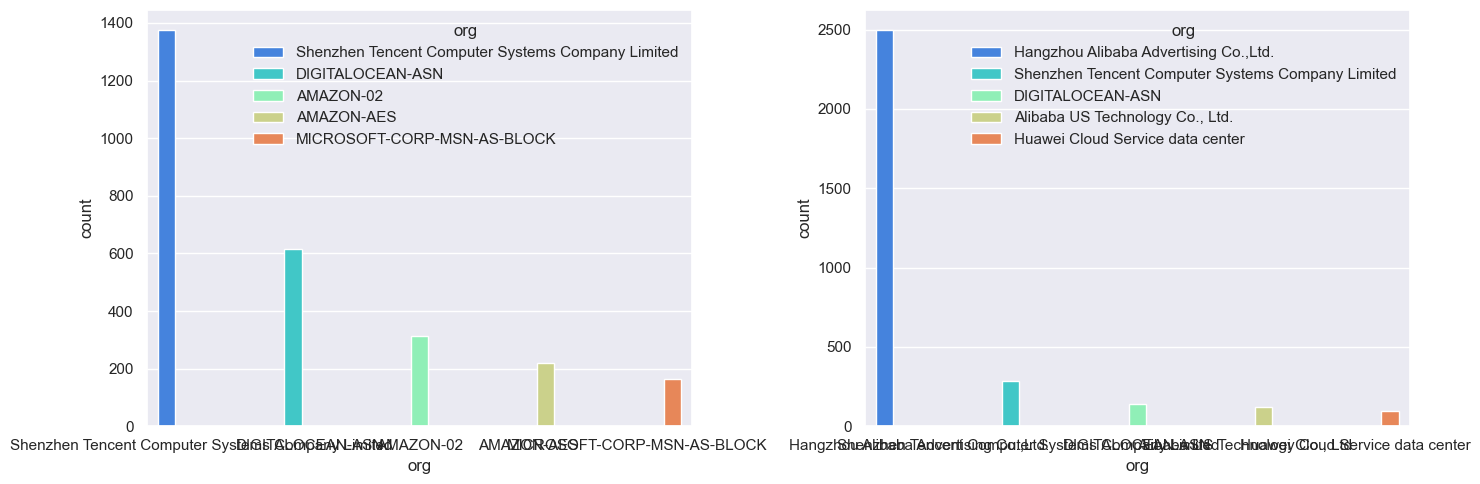

In [959]:

hue_order1 = cluster_1['org'].value_counts().iloc[:5].index
hue_order2 = cluster_2['org'].value_counts().iloc[:5].index


f, axs = plt.subplots(1,2, figsize = (15,5))

sns.countplot(x=cluster_1['org'],order=cluster_1['org'].value_counts().iloc[:5].index, hue_order=hue_order1, hue=cluster_1['org'],ax=axs[0],palette='rainbow')
sns.countplot(x=cluster_2['org'],order=cluster_2['org'].value_counts().iloc[:5].index, hue_order=hue_order2, hue=cluster_2['org'],ax=axs[1],palette='rainbow')


plt.tight_layout()
plt.show()

In [ ]:
#https://www.kaggle.com/code/ashydv/bank-customer-clustering-k-modes-clustering/notebook
#https://www.kaggle.com/code/halflingwizard/clustering-categorical-data-using-gower-distance
#https://www.youtube.com/watch?v=b39_vipRkUo
#https://github.com/nicodv/kmodes/tree/master/examples
#https://towardsdatascience.com/clustering-datasets-having-both-numerical-and-categorical-variables-ed91cdca0677
#https://towardsdatascience.com/clustering-on-numerical-and-categorical-features-6e0ebcf1cbad
#https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b
#https://www.linkedin.com/pulse/use-gower-distance-measure-diversity-bjoern-zapadlo/
#https://medium.com/analytics-vidhya/gowers-distance-899f9c4bd553
#https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/
#https://github.com/Sreemanto/Gower-s-Distance/blob/master/Gower's%20Measure.ipynb
#https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
#https://seaborn.pydata.org/tutorial/categorical.html
#https://www.kaggle.com/code/rocossa/dendrogram-hierarchical-clustering/notebook
#https://notepub.io/notes/programming-languages/python-seaborn-for-data-visualization/python-seaborn-for-data-visualization-scatter-plots/


#Cramer/Pearson

#https://www.archcloudlabs.com/projects/bulk-cs-analysis/
#https://www.mandiant.com/resources/blog/defining-cobalt-strike-components#:~:text=Cobalt%20Strike%20is%20the%20command,operator%20uses%20to%20execute%20it.
#https://www.sidechannel.blog/cobalt-strike-analise-da-infraestrutura/
#https://www.kaggle.com/code/raphaelmarques/kmodes-clustering-in-cardio-data-86-acc
#https://www.kaggle.com/code/arikmitra/kmodes-clustering-to-find-personality
#https://www.kaggle.com/code/elenasm/movies-and-phobias-kmodes-clustering
#https://www.kaggle.com/code/ignacioalorre/clustering-features-based-on-correlation-and-tags
#https://www.kaggle.com/code/pateldeep7799/k-mode-clustering-on-banking-data

In [960]:

strangeuser = finalCluster[finalCluster["user_agent"].str.contains('Mozilla') == False]
#spawnto_x86Nolobals = combinedDf[combinedDf["spawnto_x86"].str.contains('dllhost') == False]

#spawnto_x86Nolobals.head()


In [961]:

strangeuser1 = strangeuser[strangeuser["user_agent"].str.contains('0') == False]
#spawnto_x86Nolobals = combinedDf[combinedDf["spawnto_x86"].str.contains('dllhost') == False]

#spawnto_x86Nolobals.head()


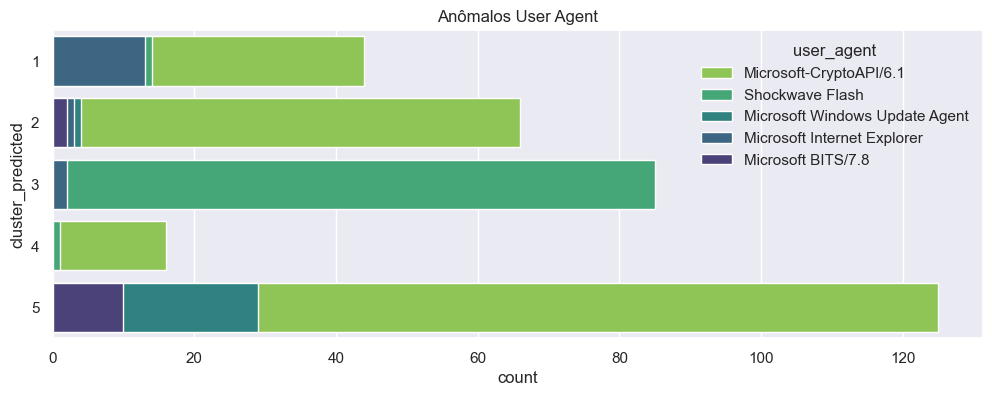

In [1448]:
plt.subplots(figsize = (12,4))

hue_order = strangeuser1['user_agent'].value_counts().iloc[:5].index

sns.countplot(dodge=False, palette='viridis_r', y=strangeuser1['cluster_predicted'],hue_order=hue_order, hue=strangeuser1['user_agent']).set(title='Anômalos User Agent')
plt.show()


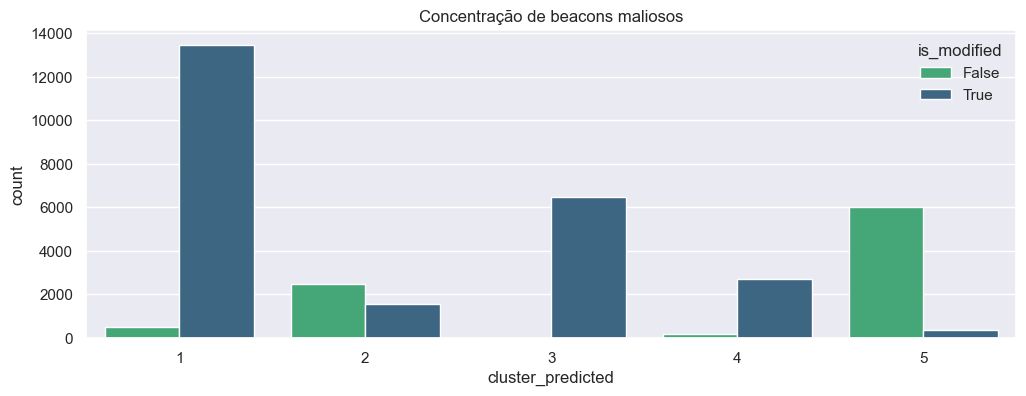

In [1400]:
plt.subplots(figsize = (12,4))


sns.countplot(palette='viridis_r', x=finalCluster['cluster_predicted'], hue=finalCluster['is_modified']).set(title='Concentração de beacons maliosos')
plt.show()


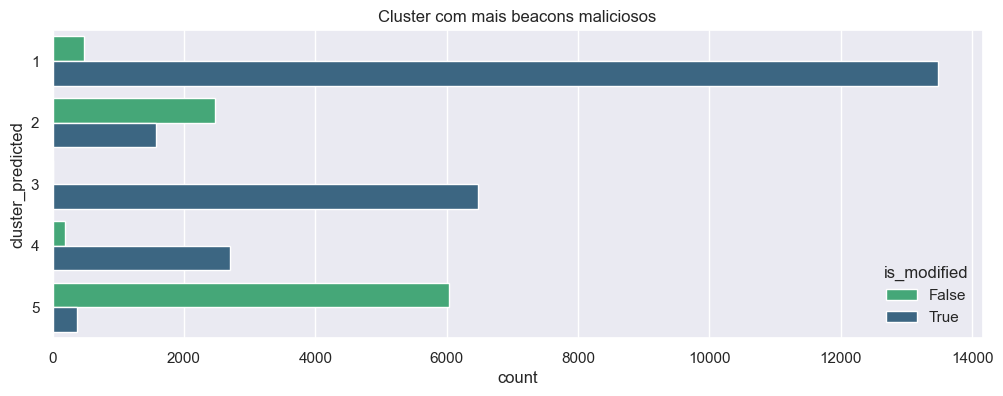

In [1301]:
plt.subplots(figsize = (12,4))


sns.countplot(palette='viridis_r', y=finalCluster['cluster_predicted'],hue=finalCluster['is_modified']).set(title='Cluster que possui a maior quantidade de beacons maliciosos')
plt.show()


In [1321]:
beaconsMaliciosos = finalCluster[finalCluster["is_modified"] == True]

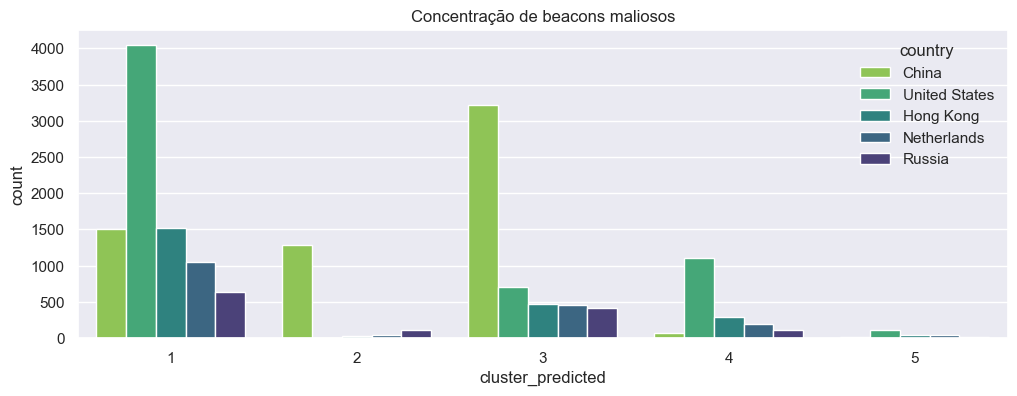

In [1335]:
plt.subplots(figsize = (12,4))

hue_order = beaconsMaliciosos['country'].value_counts().iloc[:5].index

sns.countplot(palette='viridis_r', x=beaconsMaliciosos['cluster_predicted'], hue_order=hue_order, hue=beaconsMaliciosos['country']).set(title='Concentração de beacons maliosos')
plt.show()


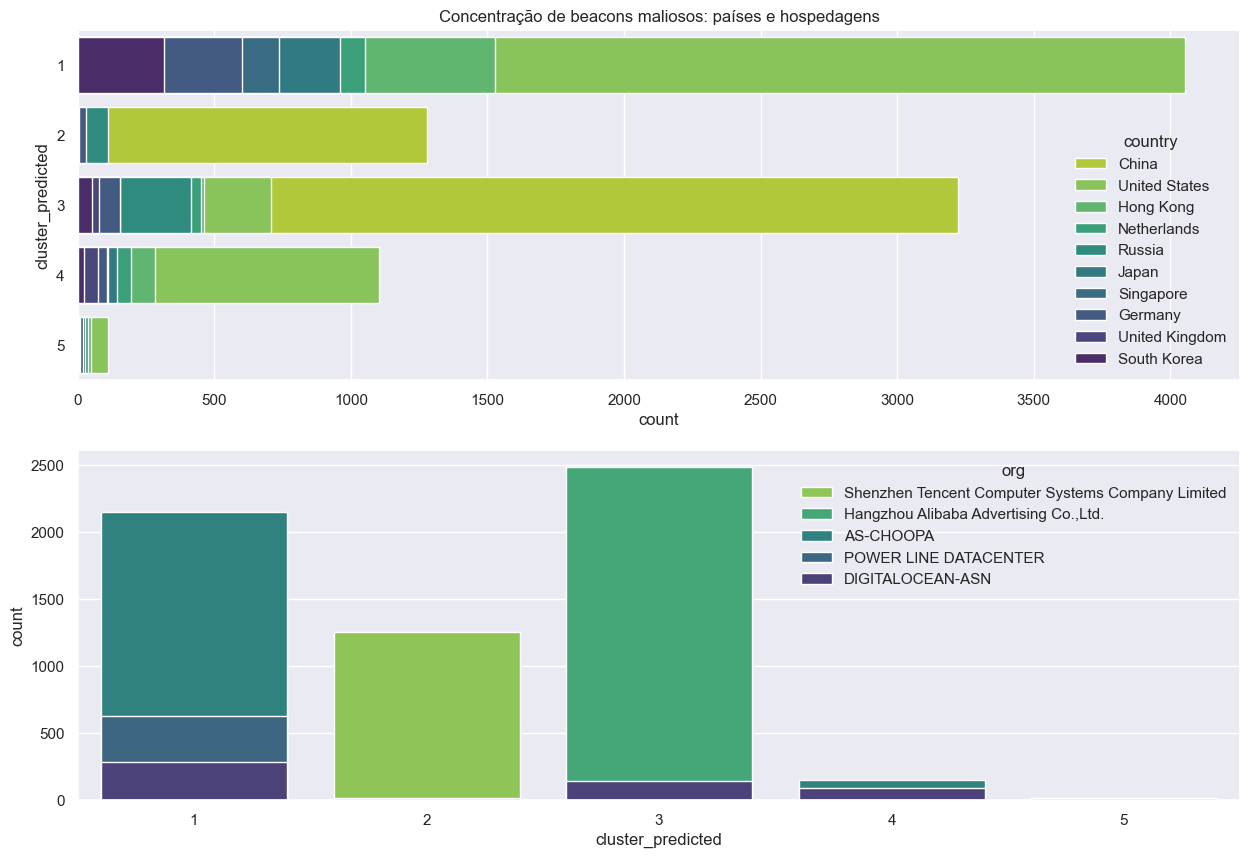

In [1443]:
f, axs = plt.subplots(2,1, figsize = (15,10))

hue_order = beaconsMaliciosos['org'].value_counts().iloc[:5].index
hue_order2 = beaconsMaliciosos['country'].value_counts().iloc[:10].index


sns.countplot(dodge=False, palette='viridis_r', y=beaconsMaliciosos['cluster_predicted'], hue_order=hue_order2, hue=beaconsMaliciosos['country'],ax=axs[0]).set(title='Concentração de beacons maliosos: países e hospedagens')
sns.countplot(ax=axs[1], dodge=False, palette='viridis_r', x=beaconsMaliciosos['cluster_predicted'], hue_order=hue_order, hue=beaconsMaliciosos['org'])

plt.show()


In [1425]:
beaconsMaliciosos2 = finalCluster[finalCluster["country"].str.contains('United States') == False]


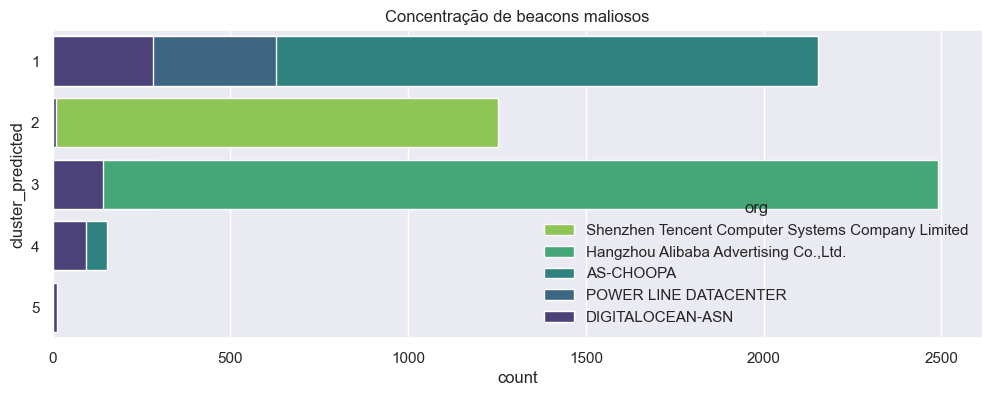

In [1436]:
plt.subplots(figsize = (12,4))

hue_order = beaconsMaliciosos['org'].value_counts().iloc[:5].index

sns.countplot(dodge=False,palette='viridis_r', y=beaconsMaliciosos['cluster_predicted'], hue_order=hue_order, hue=beaconsMaliciosos['org']).set(title='Concentração de beacons maliosos')
plt.show()


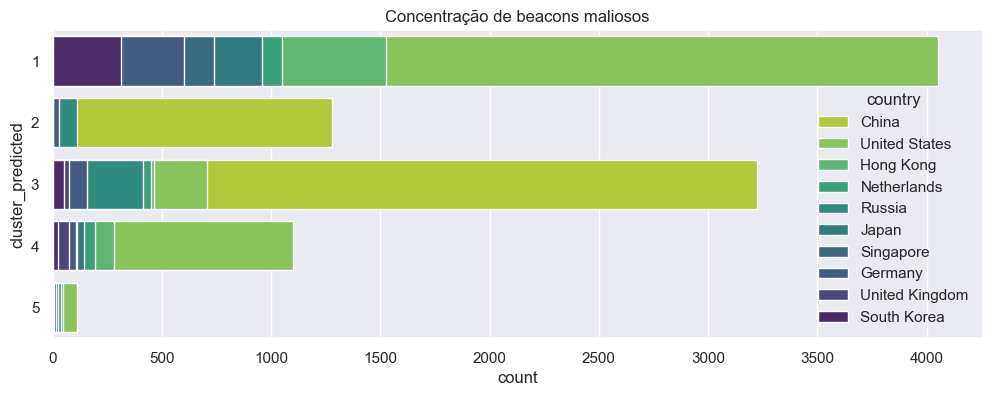

In [1434]:
plt.subplots(figsize = (12,4))

hue_order = beaconsMaliciosos['country'].value_counts().iloc[:10].index

sns.countplot(dodge=False,palette='viridis_r', y=beaconsMaliciosos['cluster_predicted'], hue_order=hue_order, hue=beaconsMaliciosos['country']).set(title='Países ')
plt.show()


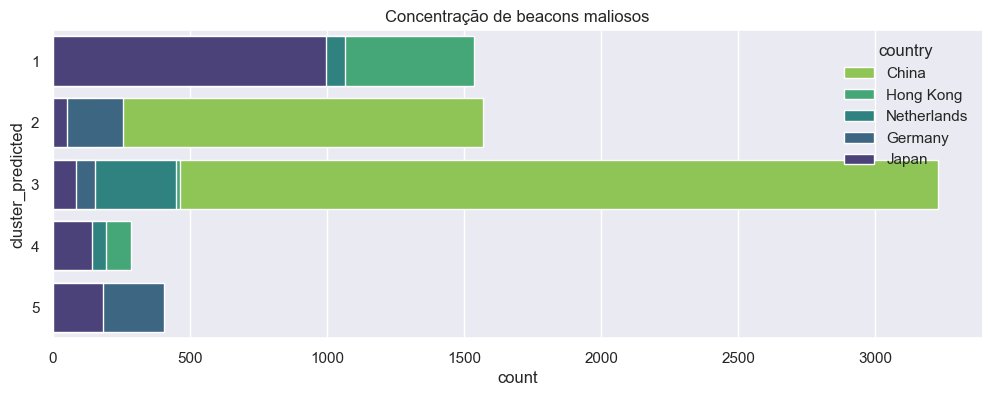

In [1426]:
plt.subplots(figsize = (12,4))

hue_order = beaconsMaliciosos2['country'].value_counts().iloc[:5].index

sns.countplot(dodge=False,palette='viridis_r', y=beaconsMaliciosos2['cluster_predicted'], hue_order=hue_order, hue=beaconsMaliciosos2['country']).set(title='Concentração de beacons maliosos')
plt.show()


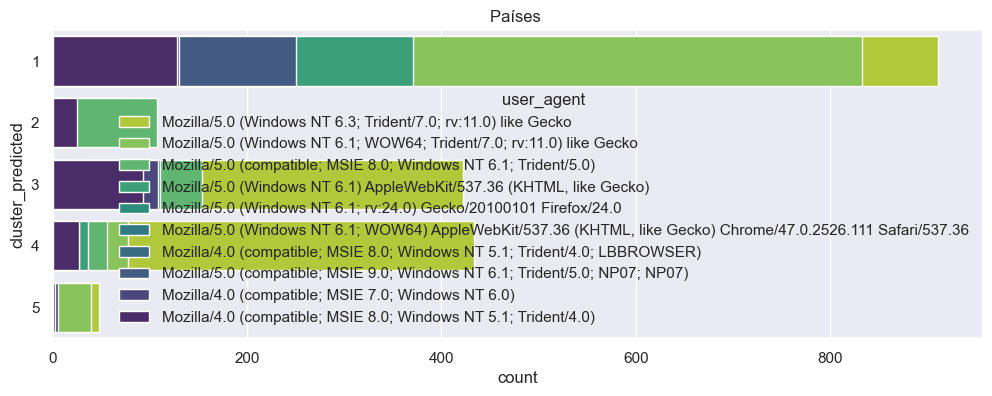

In [1446]:
plt.subplots(figsize = (12,4))

hue_order = beaconsMaliciosos['user_agent'].value_counts().iloc[:10].index

sns.countplot(dodge=False,palette='viridis_r', y=beaconsMaliciosos['cluster_predicted'], hue_order=hue_order, hue=beaconsMaliciosos['user_agent']).set(title='Países ')
plt.show()
